In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import operator

In [2]:
ipl_Auction_Raw_Data = pd.read_csv("IPLData.csv")
ipl_Auction_Raw_Data.columns

Index(['Player Name', 'Team', 'Nationality', 'Player_Type', 'Capped',
       'Matches_Played', 'Runs', 'Average', 'Strike_Rate', 'Wickets',
       'Bowling_average', 'Economy', 'Bowling_Strike_Rate', 'Catches',
       'Run_outs', 'Stumps'],
      dtype='object')

In [3]:
ipl_Auction_Raw_Data.tail(n=10)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
225,Suryakumar Yadav,Mumbai,Indian,Batter,1,115.0,2341.0,28.90,135.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,Axar Patel,Delhi,Indian,Allrounder,1,109.0,953.0,17.30,125.33,95.0,29.07,7.22,24.16,NaN,NaN,NaN
227,Umran Malik,Hyderabad,Indian,Bowler,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,Yashasvi Jaiswal,Rajasthan,Indian,Batter,1,13.0,289.0,22.23,136.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,Shubman Gill,Gujarat,Indian,Batter,1,58.0,1417.0,31.49,123.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,Ravi Bishnoi,Lucknow,Indian,Bowler,1,23.0,8.0,4.00,50.00,24.0,25.25,6.97,21.75,NaN,NaN,NaN
231,Ruturaj Gaikwad,Chennai,Indian,Batter,1,22.0,839.0,46.61,132.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,Sunil Narine,Kolkata,Overseas,Allrounder,1,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83,NaN,NaN,NaN
233,Kieron Pollard,Mumbai,Overseas,Allrounder,1,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60,NaN,NaN,NaN
234,Anrich Nortje,Delhi,Overseas,Bowler,1,24.0,7.0,7.00,116.67,34.0,20.56,7.65,16.12,NaN,NaN,NaN


In [4]:
ipl_Auction_Raw_Data.describe()

,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
count,235.000000,215.000000,165.000000,161.000000,163.000000,140.000000,135.000000,143.000000,119.000000,27.000000,27.000000,27.000000
mean,0.838298,43.897674,840.575758,21.792391,121.009939,31.485714,32.907185,8.223182,24.686134,30.962963,3.444444,6.259259
std,0.561802,48.695302,1270.341831,11.664156,30.739189,36.872420,18.191441,1.223541,12.982049,34.544822,5.010246,9.928950
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.360000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,11.500000,67.000000,13.800000,112.635000,6.000000,23.025000,7.390000,18.495000,3.500000,0.000000,0.000000
50%,1.000000,25.000000,289.000000,22.410000,128.630000,19.500000,29.070000,8.190000,21.750000,19.000000,1.000000,2.000000
75%,1.000000,56.000000,954.000000,29.300000,137.550000,40.500000,36.030000,8.785000,26.190000,51.500000,4.000000,7.000000
max,2.000000,220.000000,6283.000000,58.500000,190.240000,167.000000,153.000000,13.120000,108.000000,126.000000,21.000000,39.000000


In [5]:
ipl_Auction_Raw_Data.isna().sum()

Player Name              0
Team                     0
Nationality              0
Player_Type              0
Capped                   0
Matches_Played          20
Runs                    70
Average                 74
Strike_Rate             72
Wickets                 95
Bowling_average        100
Economy                 92
Bowling_Strike_Rate    116
Catches                208
Run_outs               208
Stumps                 208
dtype: int64

In [6]:
ipl_Auction_Raw_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player Name          235 non-null    object 
 1   Team                 235 non-null    object 
 2   Nationality          235 non-null    object 
 3   Player_Type          235 non-null    object 
 4   Capped               235 non-null    int64  
 5   Matches_Played       215 non-null    float64
 6   Runs                 165 non-null    float64
 7   Average              161 non-null    float64
 8   Strike_Rate          163 non-null    float64
 9   Wickets              140 non-null    float64
 10  Bowling_average      135 non-null    float64
 11  Economy              143 non-null    float64
 12  Bowling_Strike_Rate  119 non-null    float64
 13  Catches              27 non-null     float64
 14  Run_outs             27 non-null     float64
 15  Stumps               27 non-null     flo

In [7]:
# Segregating Data - Capped Batters

batters = ipl_Auction_Raw_Data.loc[(
    ipl_Auction_Raw_Data["Player_Type"] == "Batter")]
batters_new = batters.loc[(batters["Capped"] == 1)]
capped_batters = batters_new[["Player Name",
                              "Team", "Nationality",
                              "Matches_Played", "Runs",
                              "Average", "Strike_Rate"]]
capped_batters.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
1,Shreyas Iyer,Kolkata,Indian,87.0,2375.0,31.67,123.96
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
3,Manish Pandey,Lucknow,Indian,154.0,3560.0,30.69,121.83
4,Shimron Hetmyer,Rajasthan,Overseas,31.0,517.0,25.85,151.17


In [8]:
# Segregating Data - Capped Bowlers

bowlers = ipl_Auction_Raw_Data.loc[(
    ipl_Auction_Raw_Data["Player_Type"] == "Bowler ")]
bowlers_new = bowlers.loc[(bowlers["Capped"] == 1)]
bowlers_new = bowlers_new.reset_index()
capped_bowlers = bowlers_new[["Player Name", "Team", "Nationality",
                              "Matches_Played", "Wickets", "Bowling_average",
                              "Economy", "Bowling_Strike_Rate"]]
capped_bowlers.head()

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
0,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
1,Trent Boult,Rajasthan,Overseas,62.0,76.0,26.09,8.40,18.64
2,Mohammad Shami,Gujarat,Indian,77.0,79.0,30.41,8.63,21.14
3,T Natarajan,Hyderabad,Indian,24.0,20.0,34.40,8.24,25.05
4,Deepak Chahar,Chennai,Indian,63.0,59.0,29.19,7.80,22.44


In [9]:
# Segregating Data - Capped Keepers

keepers = ipl_Auction_Raw_Data.loc[(
    ipl_Auction_Raw_Data["Player_Type"] == "Keeper")]
keepers_new = keepers.loc[(keepers["Capped"] == 1)]
keepers_new = keepers_new.reset_index()
capped_keepers = keepers_new[["Player Name", "Team", "Nationality",
                              "Matches_Played", "Runs", "Average",
                              "Strike_Rate", "Catches", "Run_outs", "Stumps"]]
capped_keepers.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
0,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.3,130.9,53.0,0.0,14.0
1,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.4,127.5,58.0,12.0,2.0
2,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.5,136.3,19.0,1.0,2.0
3,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.5,142.2,18.0,1.0,4.0
4,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.8,129.7,123.0,14.0,32.0


In [10]:
# Segregating Data - Capped Allrounders
allRounders = ipl_Auction_Raw_Data.loc[(
    ipl_Auction_Raw_Data["Player_Type"] == "Allrounder")]
allRounders_new = allRounders.loc[(allRounders["Capped"] == 1)]
allRounders_new = allRounders_new.reset_index()
capped_allRounders = allRounders_new[["Player Name", "Team", "Nationality",
                                      "Player_Type", "Matches_Played", "Runs",
                                      "Average", "Strike_Rate", "Wickets",
                                      "Bowling_average", "Economy", "Bowling_Strike_Rate"]]
capped_allRounders.head()

,Player Name,Team,Nationality,Player_Type,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
0,Ravichandran Ashwin,Rajasthan,Indian,Allrounder,167.0,456.0,11.12,109.88,145.0,27.80,6.91,24.12
1,Pat Cummins,Kolkata,Overseas,Allrounder,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
2,Dwayne Bravo,Chennai,Overseas,Allrounder,151.0,1537.0,22.94,130.25,167.0,24.32,8.36,17.44
3,Nitish Rana,Kolkata,Indian,Allrounder,77.0,1820.0,28.00,132.46,7.0,22.00,8.03,16.43
4,Jason Holder,Lucknow,Overseas,Allrounder,26.0,189.0,14.54,121.15,35.0,22.46,8.20,16.43


In [11]:
# Cleaning the Data by making the null or NaN values 0.
capped_batters = capped_batters.fillna(0)
capped_bowlers = capped_bowlers.fillna(0)
capped_keepers = capped_keepers.fillna(0)
capped_allRounders = capped_allRounders.fillna(0)


In [12]:
# Checking the null values in the Data
print(capped_batters.isna().sum())
print(capped_bowlers.isna().sum())
print(capped_keepers.isna().sum())
print(capped_allRounders.isna().sum())

Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64
Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
Catches           0
Run_outs          0
Stumps            0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Player_Type            0
Matches_Played         0
Runs                   0
Average                0
Strike_Rate            0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64


In [13]:
def map_players_dictionary(list, function):
    return dict(zip(list, map(function, list)))

<h1>Initial Analysis</h1>

In [14]:
# Analyzing the Batters Data
# Here we have narrowed our analysis to batters who have a batting average more than 32.0
top_batters = capped_batters.loc[(capped_batters["Average"]>= 32.0)]
top_batters = top_batters.reset_index()
top_batters = top_batters.drop(columns=["index"])

# Sorting the data in descending order - with respect to each parameter
top_batters_average = top_batters.sort_values("Average", ascending=False)
top_batters_average = top_batters_average.reset_index()
top_batters_average = top_batters_average.drop(columns=["index"])

top_batters_strike_rate = top_batters.sort_values("Strike_Rate", ascending=False)
top_batters_strike_rate = top_batters_strike_rate.reset_index()
top_batters_strike_rate = top_batters_strike_rate.drop(columns=["index"])

top_batters_runs = top_batters.sort_values("Runs", ascending=False)
top_batters_runs = top_batters_runs.reset_index()
top_batters_runs = top_batters_runs.drop(columns=["index"])

top_batters_matches = top_batters.sort_values("Matches_Played", ascending=False)
top_batters_matches = top_batters_matches.reset_index()
top_batters_matches = top_batters_matches.drop(columns=["index"])

In [15]:
batters_name_array = []

for name in top_batters["Player Name"]:
    batters_name_array.append(name)


In [16]:
initial_batters_point_objects_of_array = map_players_dictionary(
    batters_name_array,
    lambda name: (
        (len(top_batters) - top_batters_average[top_batters_average["Player Name"]==name].index[0]) +
        (len(top_batters) - top_batters_strike_rate[top_batters_strike_rate["Player Name"]==name].index[0]) +
        (len(top_batters) - top_batters_runs[top_batters_average["Player Name"]==name].index[0]) 
    )
)
sorted_best_batters = sorted(initial_batters_point_objects_of_array.items(), key=operator.itemgetter(1), reverse=True)

In [17]:
print("Here are the best Batters as per our analysis:")
print("1st: "+sorted_best_batters[0][0])
print("2nd: "+sorted_best_batters[1][0])
print("3rd: "+sorted_best_batters[2][0])
print("4th: "+sorted_best_batters[3][0])
print("5th: "+sorted_best_batters[4][0])

Here are the best Batters as per our analysis:
1st: KL Rahul 
2nd: David Warner 
3rd: Ruturaj Gaikwad
4th: Kane Williamson
5th: Virat Kohli


In [18]:
# Analyzing the bowlers data
# Here we have narrowed our analysis based on "Bowling Averages" of the players to be less than 24.0
top_bowlers_1 = capped_bowlers.loc[(capped_bowlers["Bowling_average"] <= 24.0)]
top_bowlers = top_bowlers_1.loc[(top_bowlers_1["Matches_Played"]>= 3)]
top_bowlers = top_bowlers.reset_index()
top_bowlers = top_bowlers.drop(columns=["index"])

#Bowling Average
top_bowlers_average = top_bowlers.sort_values("Bowling_average")
top_bowlers_average = top_bowlers_average.reset_index()
top_bowlers_average = top_bowlers_average.drop(columns=["index"])

#Bowling Strike Rate
top_bowlers_strike_rate = top_bowlers.sort_values("Bowling_Strike_Rate")
top_bowlers_strike_rate = top_bowlers_strike_rate.reset_index()
top_bowlers_strike_rate = top_bowlers_strike_rate.drop(columns=["index"])

#Bowling Wickets
top_bowlers_wickets = top_bowlers.sort_values("Wickets",ascending=False)
top_bowlers_wickets = top_bowlers_wickets.reset_index()
top_bowlers_wickets = top_bowlers_wickets.drop(columns=["index"])

#Bowling Economy
top_bowlers_economy = top_bowlers.sort_values("Economy")
top_bowlers_economy = top_bowlers_economy.reset_index()
top_bowlers_economy = top_bowlers_economy.drop(columns=["index"])

#Bowler's Matches
top_bowlers_matches = top_bowlers.sort_values("Matches_Played",ascending=False)
top_bowlers_matches = top_bowlers_matches.reset_index()
top_bowlers_matches = top_bowlers_matches.drop(columns=["index"])

In [19]:
bowlers_name_array = []

for name in top_bowlers["Player Name"]:
    bowlers_name_array.append(name)


In [20]:
initial_bowlers_point_object_of_arrays = map_players_dictionary(
    bowlers_name_array,
    lambda name:
        (
            (len(top_bowlers) - top_bowlers_average[top_bowlers_average["Player Name"]==name].index[0]) +
            (len(top_bowlers) - top_bowlers_strike_rate[top_bowlers_strike_rate["Player Name"]==name].index[0]) +
            (len(top_bowlers) - top_bowlers_wickets[top_bowlers_wickets["Player Name"]==name].index[0]) +
            (len(top_bowlers) - top_bowlers_economy[top_bowlers_economy["Player Name"]==name].index[0]) 
        )
)
sorted_best_bowlers = sorted(initial_bowlers_point_object_of_arrays.items(), key=operator.itemgetter(1), reverse=True)

In [21]:
print("Here are the best Bowlers as per our analysis:")
print("1st: "+sorted_best_bowlers[0][0])
print("2nd: "+sorted_best_bowlers[1][0])
print("3rd: "+sorted_best_bowlers[2][0])
print("4th: "+sorted_best_bowlers[3][0])
print("5th: "+sorted_best_bowlers[4][0])

Here are the best Bowlers as per our analysis:
1st: Kagiso Rabada 
2nd: Yuzvendra Chahal 
3rd: Nathan Coulter-Nile
4th: Lungi Ngidi 
5th: Alzarri Joseph


In [22]:
# Analyzing the AllRounder Data
# We have narrowed our analysis by further segregating the allrounders based on strike rate equal to or more than 140.0

top_allRounders = capped_allRounders.loc[(capped_allRounders["Strike_Rate"] >= 140.0)]
top_allRounders = top_allRounders.reset_index()
top_allRounders = top_allRounders.drop(columns=["index"])

# All Rounder Batting Average
top_allRounders_average = top_allRounders.sort_values("Average", ascending=False)
top_allRounders_average = top_allRounders_average.reset_index()
top_allRounders_average = top_allRounders_average.drop(columns=["index"])

# All Rouunder Strike Rate
top_allRounders_strike_rate = top_allRounders.sort_values("Strike_Rate", ascending=False)
top_allRounders_strike_rate = top_allRounders_strike_rate.reset_index()
top_allRounders_strike_rate = top_allRounders_strike_rate.drop(columns=["index"])

# All Rounder Runs
top_allRounders_runs = top_allRounders.sort_values("Runs", ascending=False)
top_allRounders_runs = top_allRounders_runs.reset_index()
top_allRounders_runs = top_allRounders_runs.drop(columns=["index"])

# All Rounder Wickets
top_allRounders_wickets = top_allRounders.sort_values("Wickets", ascending=False)
top_allRounders_wickets = top_allRounders_wickets.reset_index()
top_allRounders_wickets = top_allRounders_wickets.drop(columns=["index"])

# All Rounder Bowling Average
top_allRounders_bowling_average = top_allRounders.sort_values("Bowling_average")
top_allRounders_bowling_average = top_allRounders_bowling_average.reset_index()
top_allRounders_bowling_average = top_allRounders_bowling_average.drop(columns=["index"])

# All Rounder Economy
top_allRounders_Economy = top_allRounders.sort_values("Economy")
top_allRounders_Economy = top_allRounders_Economy.reset_index()
top_allRounders_Economy = top_allRounders_Economy.drop(columns=["index"])

# All Rounder Bowling Strike Rate
top_allRounders_bowling_strike_rate = top_allRounders.sort_values("Bowling_Strike_Rate")
top_allRounders_bowling_strike_rate = top_allRounders_bowling_strike_rate.reset_index()
top_allRounders_bowling_strike_rate = top_allRounders_bowling_strike_rate.drop(columns=["index"])

# All Rounder Number of Matches
top_allRounders_matches = top_allRounders.sort_values("Matches_Played",ascending=False)
top_allRounders_matches = top_allRounders_matches.reset_index()
top_allRounders_matches = top_allRounders_matches.drop(columns=["index"])

In [23]:
all_rounders_name_array = []

for name in top_allRounders["Player Name"]:
    all_rounders_name_array.append(name)



In [24]:
initial_all_rounders_points_objects_of_array = map_players_dictionary(
    all_rounders_name_array,
    lambda name:
                (
                    (len(top_allRounders) - top_allRounders_average[top_allRounders_average["Player Name"]== name].index[0]) +
                    (len(top_allRounders) - top_allRounders_strike_rate[top_allRounders_strike_rate["Player Name"]== name].index[0]) +
                    (len(top_allRounders) - top_allRounders_runs[top_allRounders_runs["Player Name"]== name].index[0]) +
                    (len(top_allRounders) - top_allRounders_wickets[top_allRounders_wickets["Player Name"]== name].index[0]) +
                    (len(top_allRounders) - top_allRounders_bowling_average[top_allRounders_bowling_average["Player Name"]== name].index[0]) +
                    (len(top_allRounders) - top_allRounders_Economy[top_allRounders_Economy["Player Name"]== name].index[0]) +
                    (len(top_allRounders) - top_allRounders_bowling_strike_rate[top_allRounders_bowling_strike_rate["Player Name"]== name].index[0])                 )
)

sorted_best_all_rounders = sorted(initial_all_rounders_points_objects_of_array.items(), key=operator.itemgetter(1),reverse=True)

In [25]:
print("Here are the best All Rounders as per our analysis:")
print("1st: "+sorted_best_all_rounders[0][0])
print("2nd: "+sorted_best_all_rounders[1][0])
print("3rd: "+sorted_best_all_rounders[2][0])
print("4th: "+sorted_best_all_rounders[3][0])

Here are the best All Rounders as per our analysis:
1st: Andre Russell
2nd: Sunil Narine 
3rd: Jofra Archer
4th: Kieron Pollard 


In [26]:
# Analyzing the keepers data
# We have narrowed our analysis down to keepers averaging more than 25.0

top_keepers = capped_keepers.loc[(capped_keepers["Average"]>=25.0)]
top_keepers = top_keepers.reset_index()
top_keepers = top_keepers.drop(columns=["index"])

# Keepers Average
top_keepers_average = top_keepers.sort_values("Average", ascending=False)
top_keepers_average = top_keepers_average.reset_index()
top_keepers_average = top_keepers_average.drop(columns=["index"])

# Keepers Strike Rate
top_keepers_strike_rate = top_keepers.sort_values("Strike_Rate",ascending=False)
top_keepers_strike_rate = top_keepers_strike_rate.reset_index()
top_keepers_strike_rate = top_keepers_strike_rate.drop(columns=["index"])

# Keepers Runs
top_keepers_runs = top_keepers.sort_values("Runs",ascending=False)
top_keepers_runs = top_keepers_runs.reset_index()
top_keepers_runs = top_keepers_runs.drop(columns=["index"])

# Keepers Matches
top_keepers_matches = top_keepers.sort_values("Matches_Played", ascending=False)
top_keepers_matches = top_keepers_matches.reset_index()
top_keepers_matches = top_keepers_matches.drop(columns=["index"])

# keepers Catches
top_keepers_catches = top_keepers.sort_values("Catches", ascending=False)
top_keepers_catches = top_keepers_catches.reset_index()
top_keepers_catches = top_keepers_catches.drop(columns=["index"])

# Keepers Runouts
top_keepers_runouts = top_keepers.sort_values("Run_outs", ascending=False)
top_keepers_runouts = top_keepers_runouts.reset_index()
top_keepers_runouts = top_keepers_runouts.drop(columns=["index"])

# Keepers Stumps
top_keepers_stumps = top_keepers.sort_values("Stumps", ascending=False)
top_keepers_stumps = top_keepers_stumps.reset_index()
top_keepers_stumps = top_keepers_stumps.drop(columns=["index"])

In [27]:
sorted_keepers_array = []

for name in top_keepers_average["Player Name"]:
    sorted_keepers_array.append(name)


In [28]:
best_keepers_point_objects_of_array = map_players_dictionary(
    sorted_keepers_array,
    lambda name: (
        (len(top_keepers) - top_keepers_average[top_keepers_average["Player Name"] == name].index[0])
        + (len(top_keepers) - top_keepers_strike_rate[top_keepers_strike_rate["Player Name"] == name].index[0])
        + (len(top_keepers) - top_keepers_runs[top_keepers_runs["Player Name"] == name].index[0])
        + (len(top_keepers) - top_keepers_catches[top_keepers_catches["Player Name"] == name].index[0])
        + (len(top_keepers) - top_keepers_runouts[top_keepers_runouts["Player Name"] == name].index[0])
        + (len(top_keepers) - top_keepers_stumps[top_keepers_stumps["Player Name"] == name].index[0])
    ),
)
sorted_best_keepers = sorted(best_keepers_point_objects_of_array.items(), key=operator.itemgetter(1),reverse=True)

In [29]:
# Here are the best keepers as per our analysis:
print("1st: " + sorted_best_keepers[0][0])
print("2nd: " + sorted_best_keepers[1][0])
print("3rd: " + sorted_best_keepers[2][0])
print("4th: " + sorted_best_keepers[3][0])

1st: MS Dhoni
2nd: Rishabh Pant 
3rd: Dinesh Karthik
4th: Sanju Samson


<h1>Visualization For Enhanced Analysis</h1>

<Axes: xlabel='Player Name', ylabel='Average'>

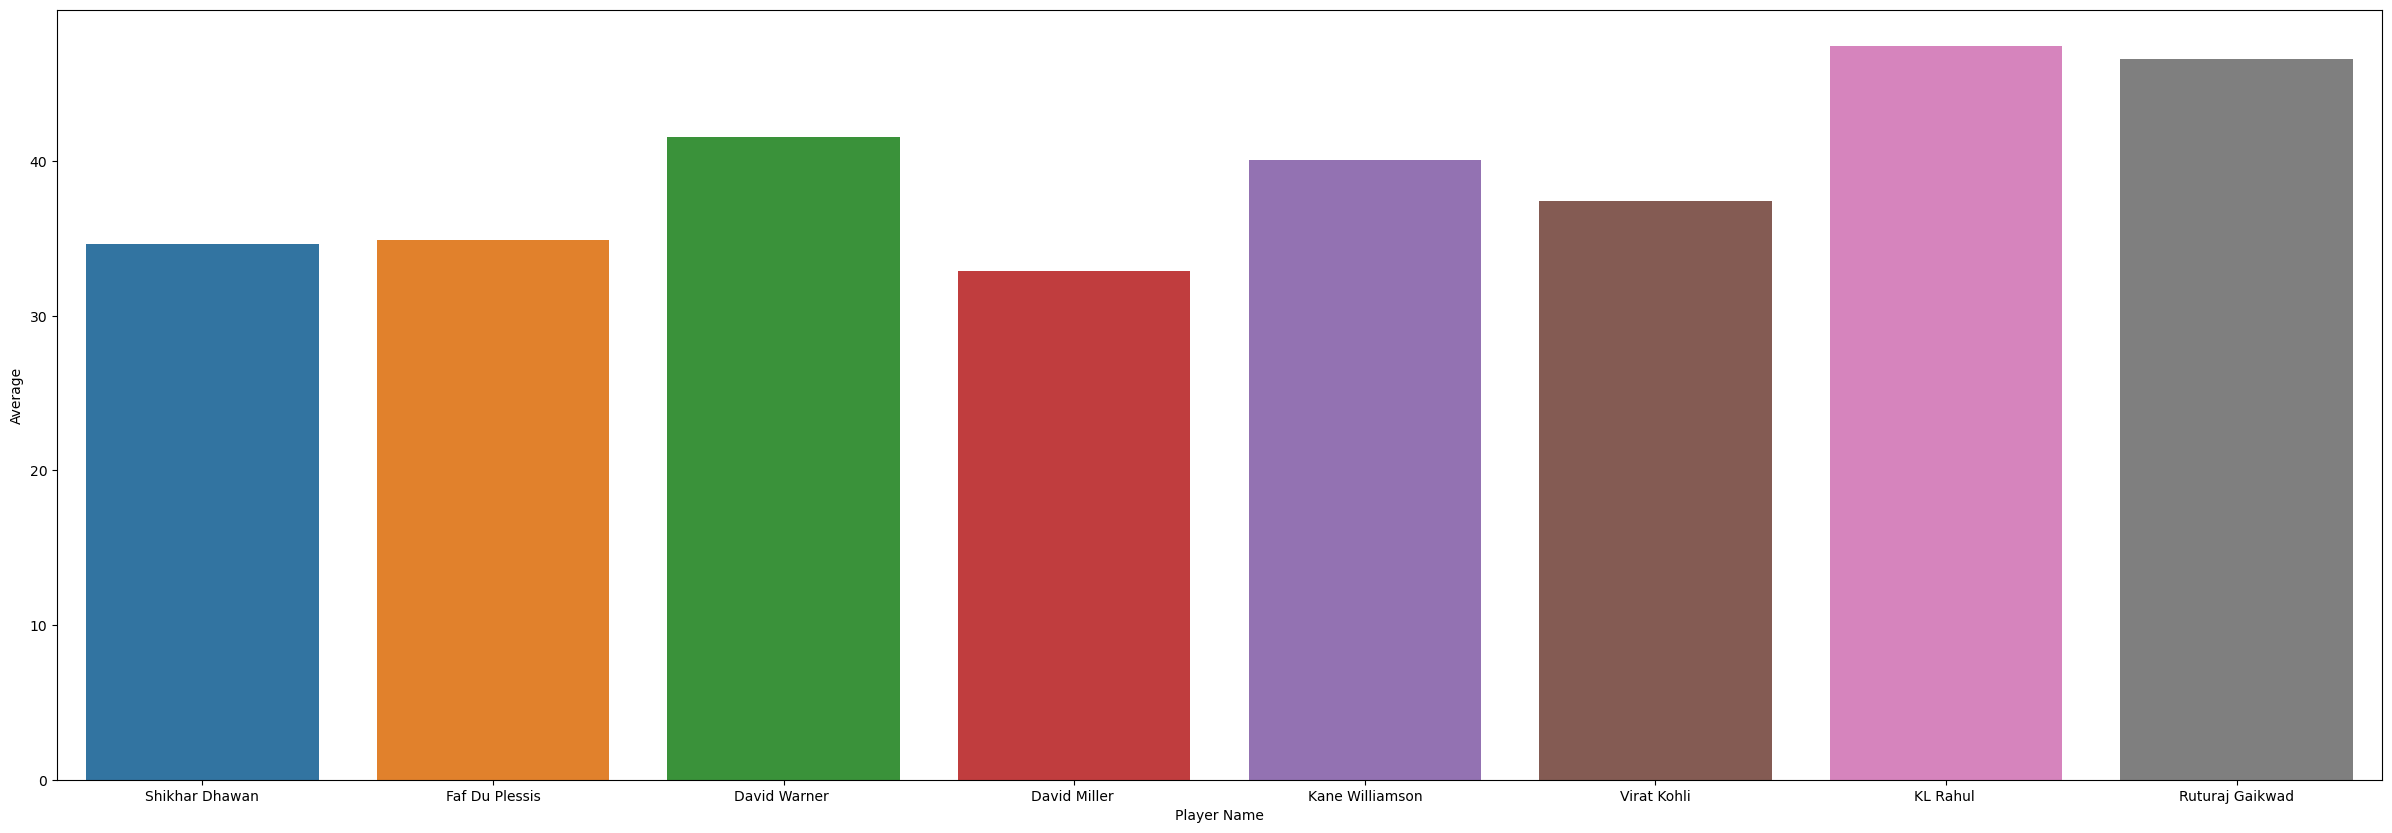

In [30]:
#Visualization of Batter's Average
plt.figure(figsize=(30,10))
sns.barplot(x="Player Name", y="Average" ,data=top_batters)

<Axes: xlabel='Player Name', ylabel='Strike_Rate'>

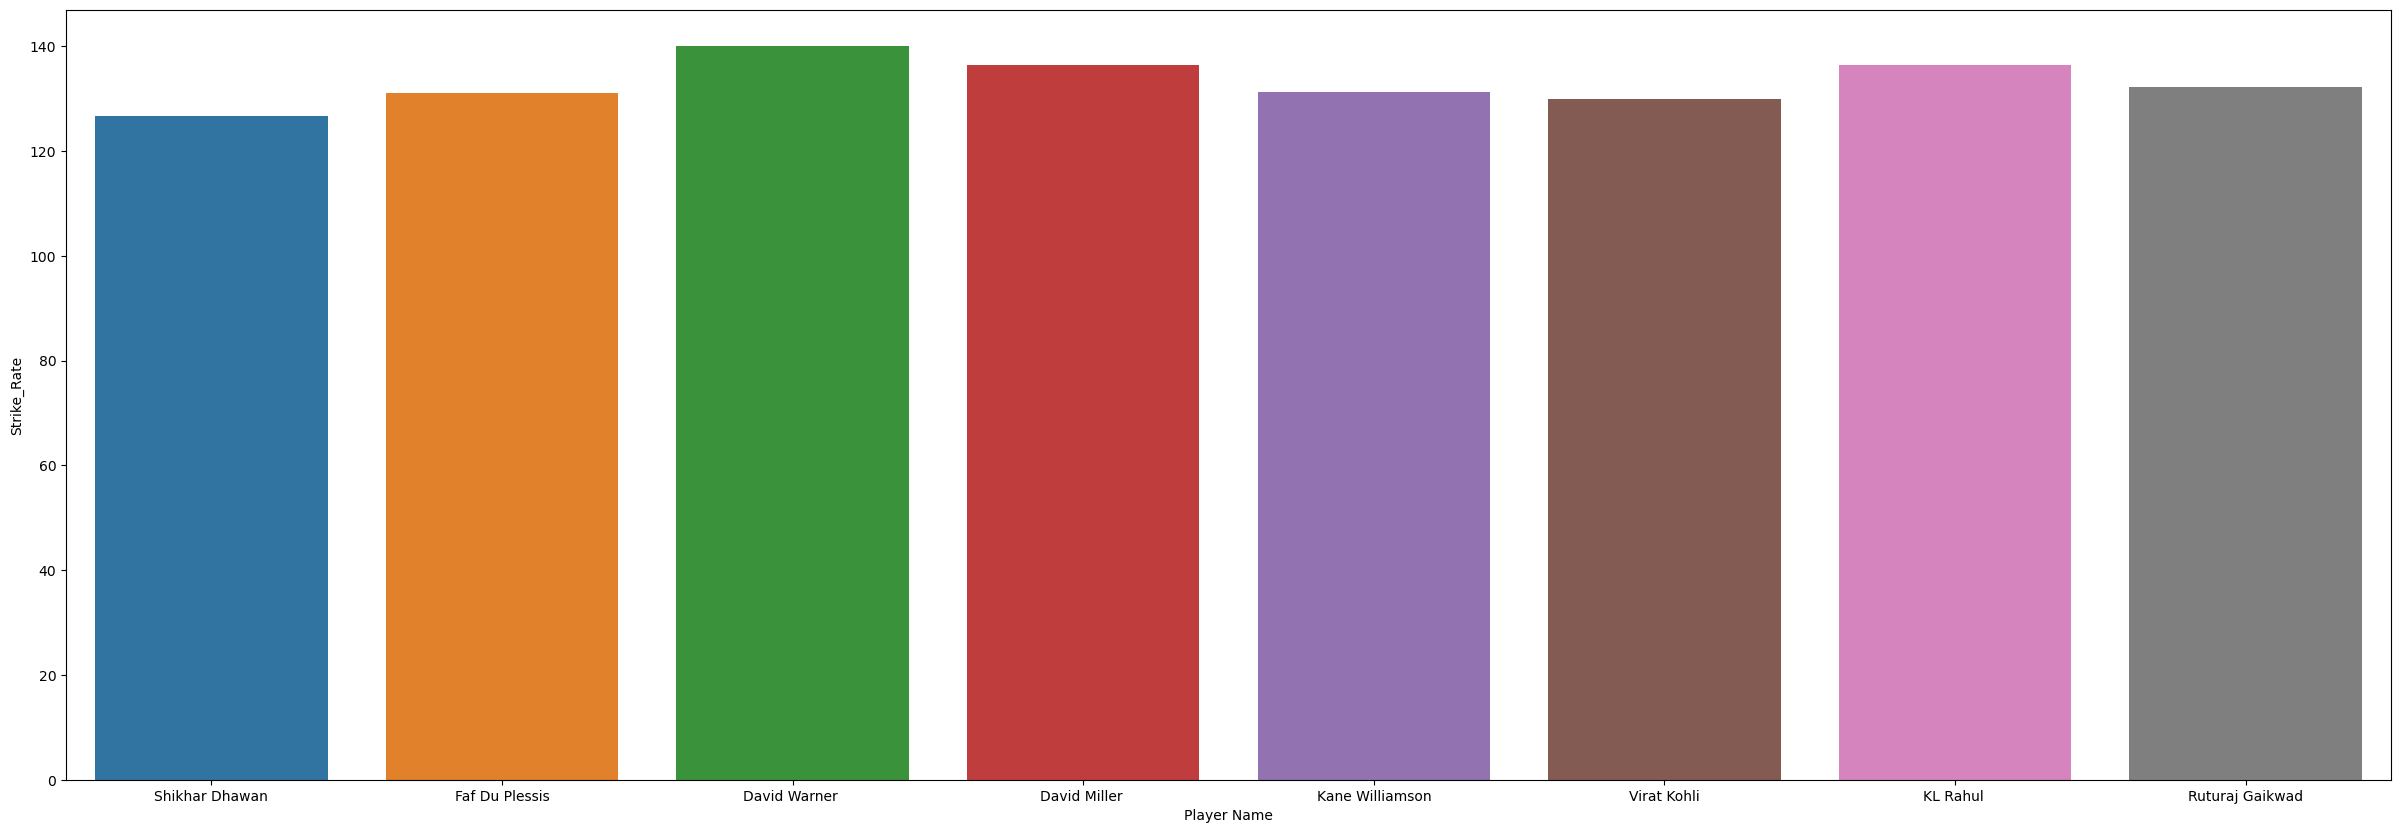

In [31]:
#Visualization of Batter's Strike Rate
plt.figure(figsize=(30,10))
sns.barplot(x="Player Name", y="Strike_Rate" ,data=top_batters)


<Axes: xlabel='Player Name', ylabel='Runs'>

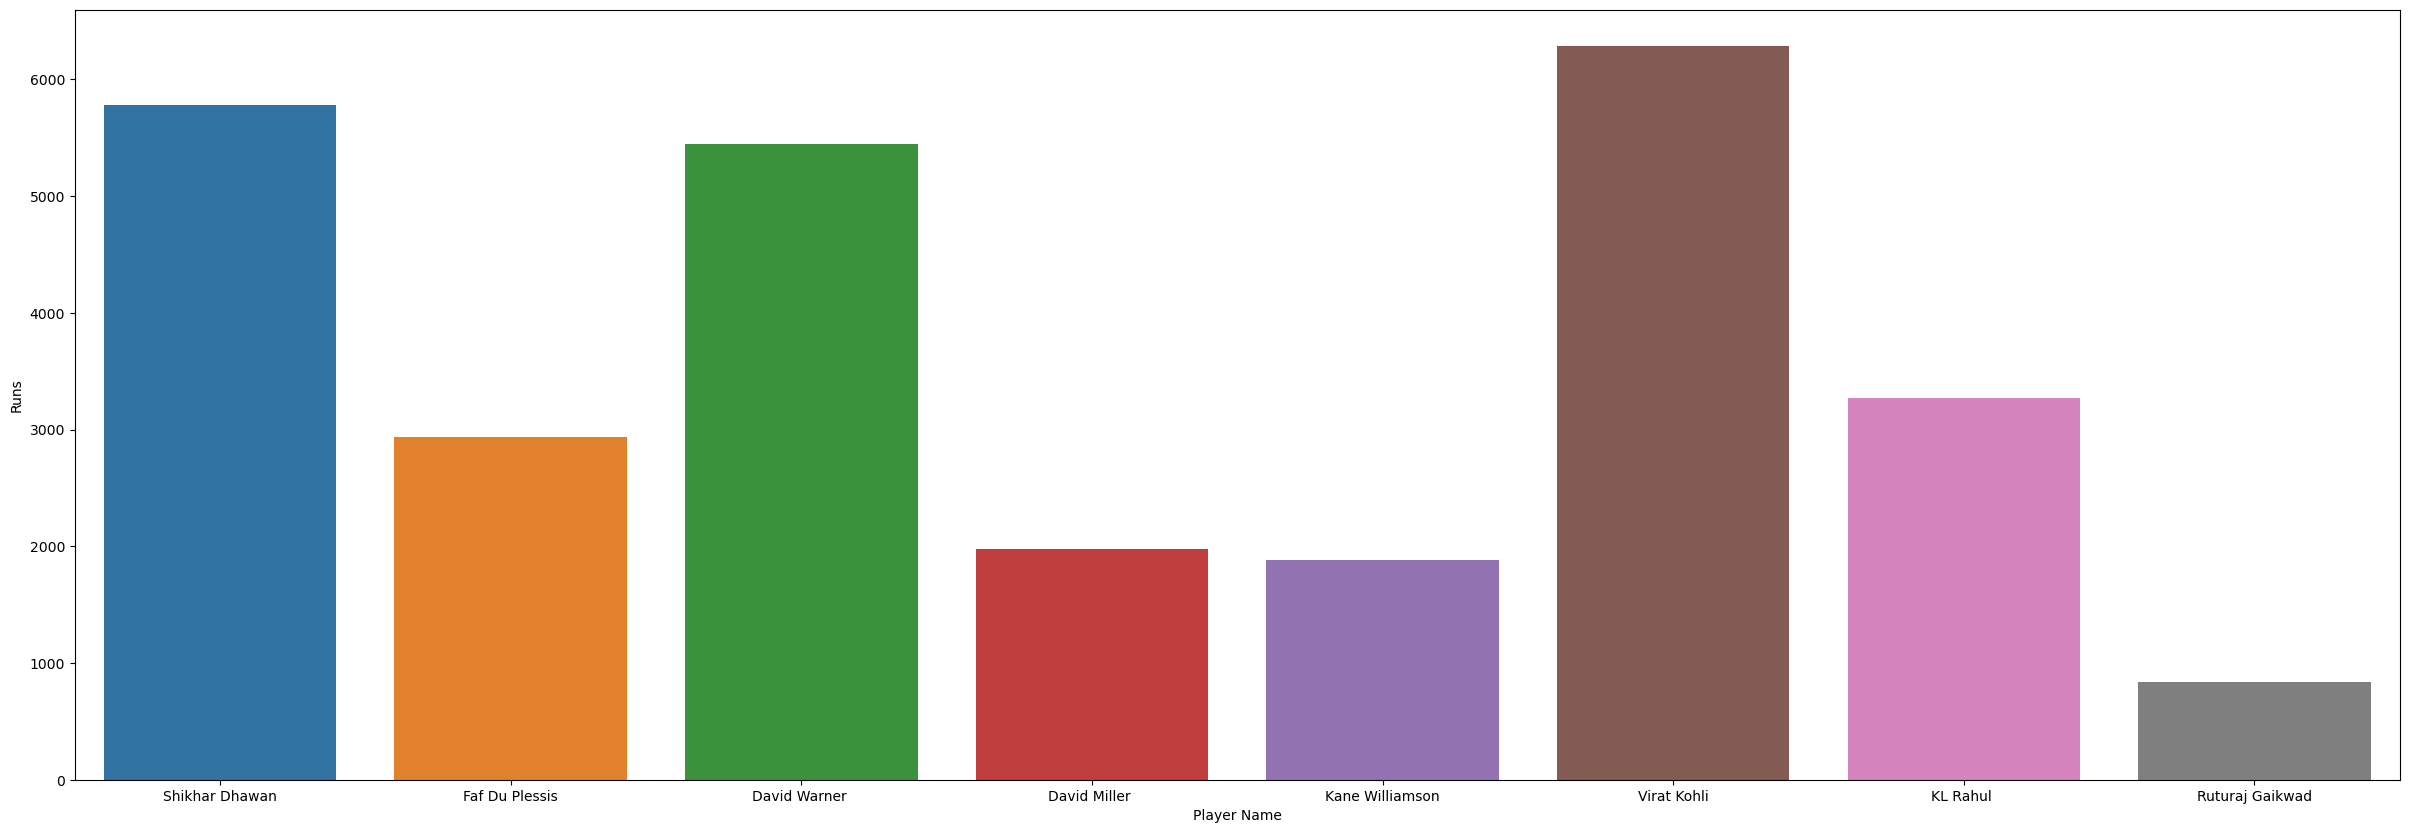

In [32]:
#Visualization of Batter's Runs
plt.figure(figsize=(30,10))
sns.barplot(x="Player Name", y="Runs" ,data=top_batters)

In [33]:
# Here are the best batters as per our analysis:
print("1st: "+sorted_best_batters[0][0])
print("2nd: "+sorted_best_batters[1][0])
print("3rd: "+sorted_best_batters[2][0])
print("4th: "+sorted_best_batters[3][0])
print("5th: "+sorted_best_batters[4][0])

1st: KL Rahul 
2nd: David Warner 
3rd: Ruturaj Gaikwad
4th: Kane Williamson
5th: Virat Kohli


<Axes: xlabel='Player Name', ylabel='Bowling_average'>

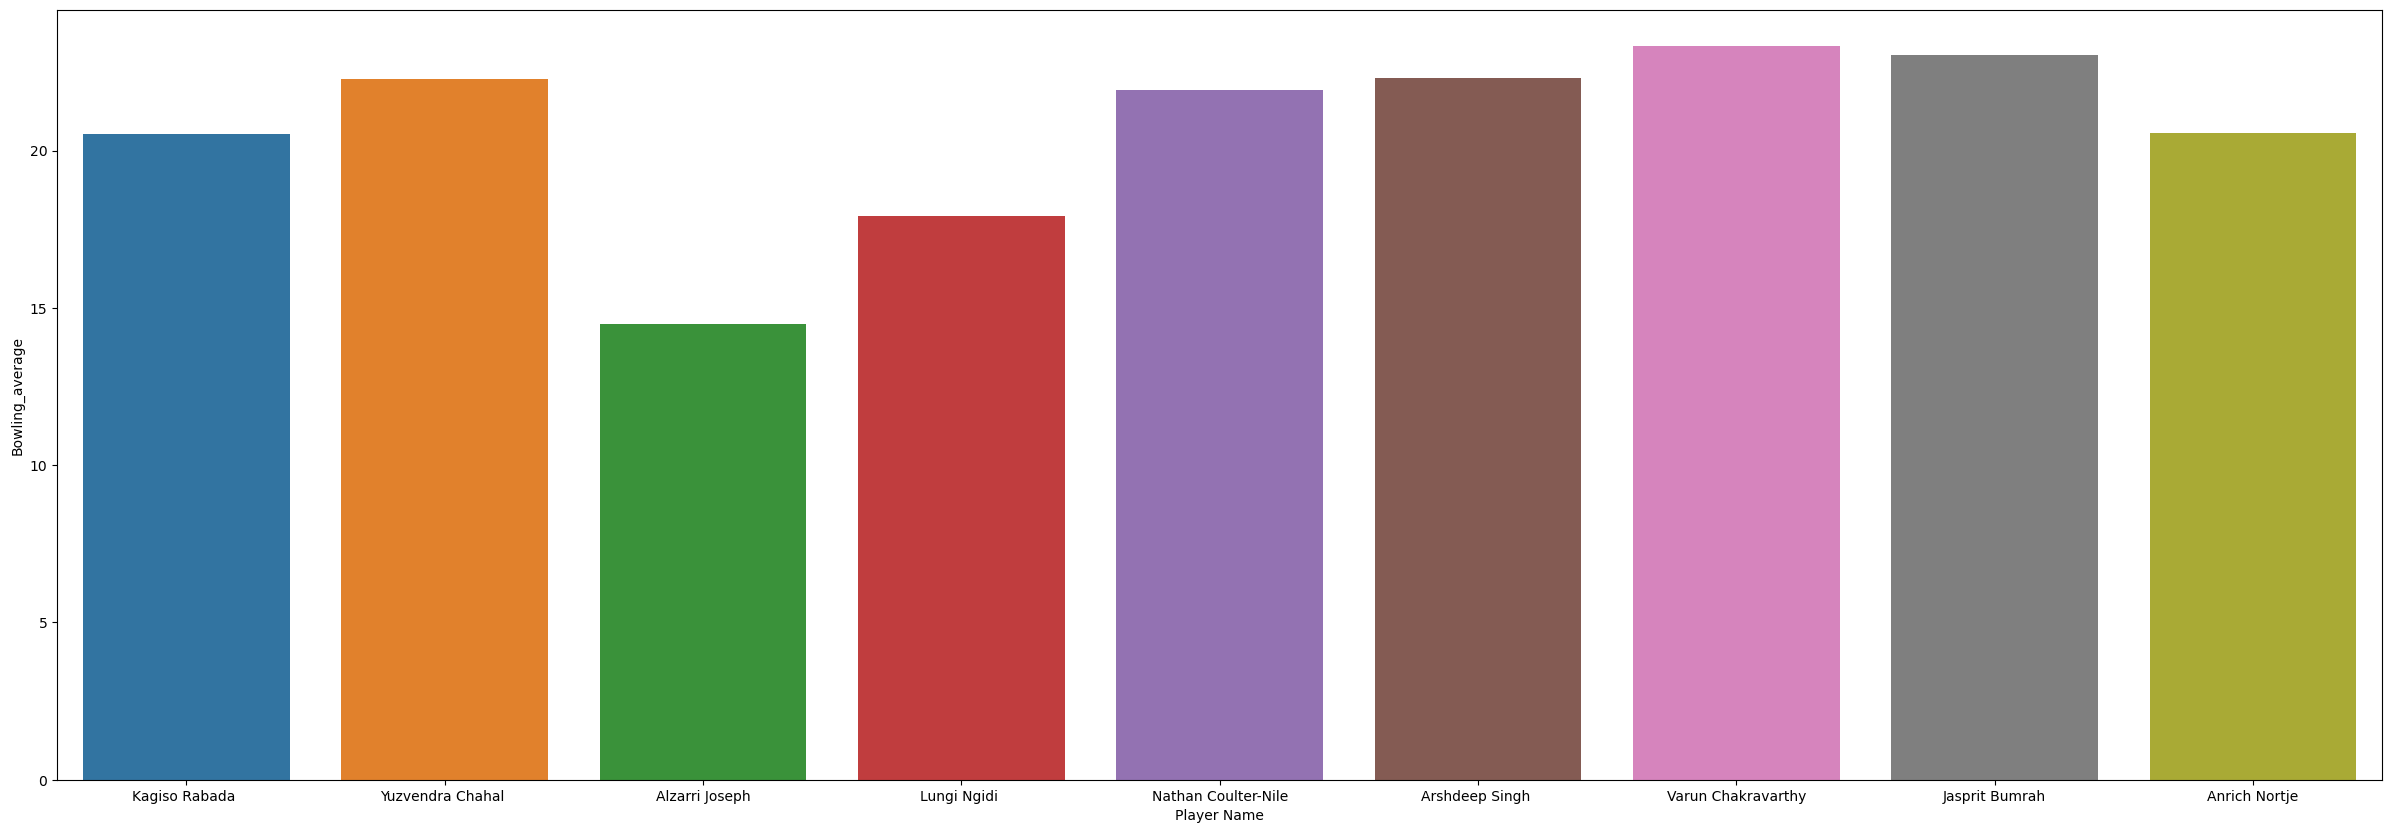

In [34]:
# Visualization of Bowler's Average
# Less Means Good
plt.figure(figsize=(30,10))
sns.barplot(x="Player Name", y="Bowling_average" ,data=top_bowlers)

<Axes: xlabel='Player Name', ylabel='Economy'>

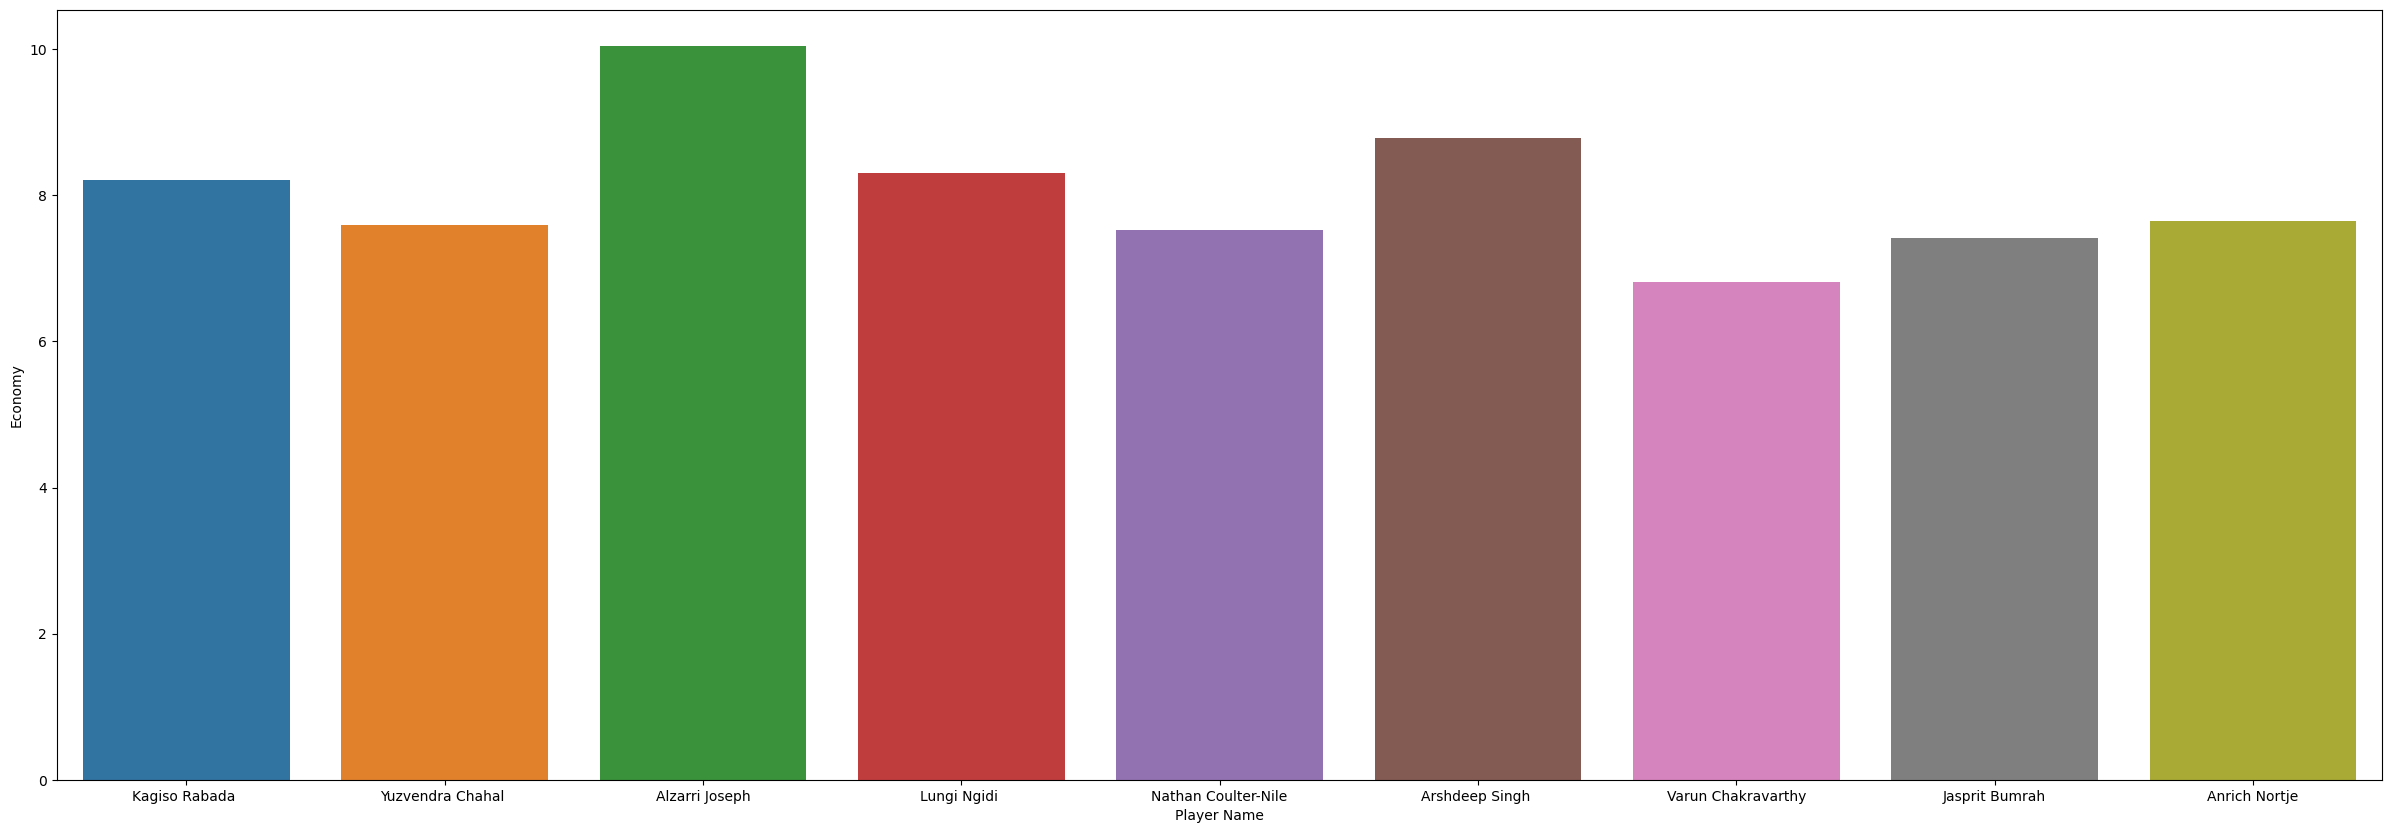

In [35]:
# Visualization for Bowler's Economy
# Less means good
plt.figure(figsize=(30,10))
sns.barplot(x="Player Name", y="Economy",data=top_bowlers)

<Axes: xlabel='Player Name', ylabel='Bowling_Strike_Rate'>

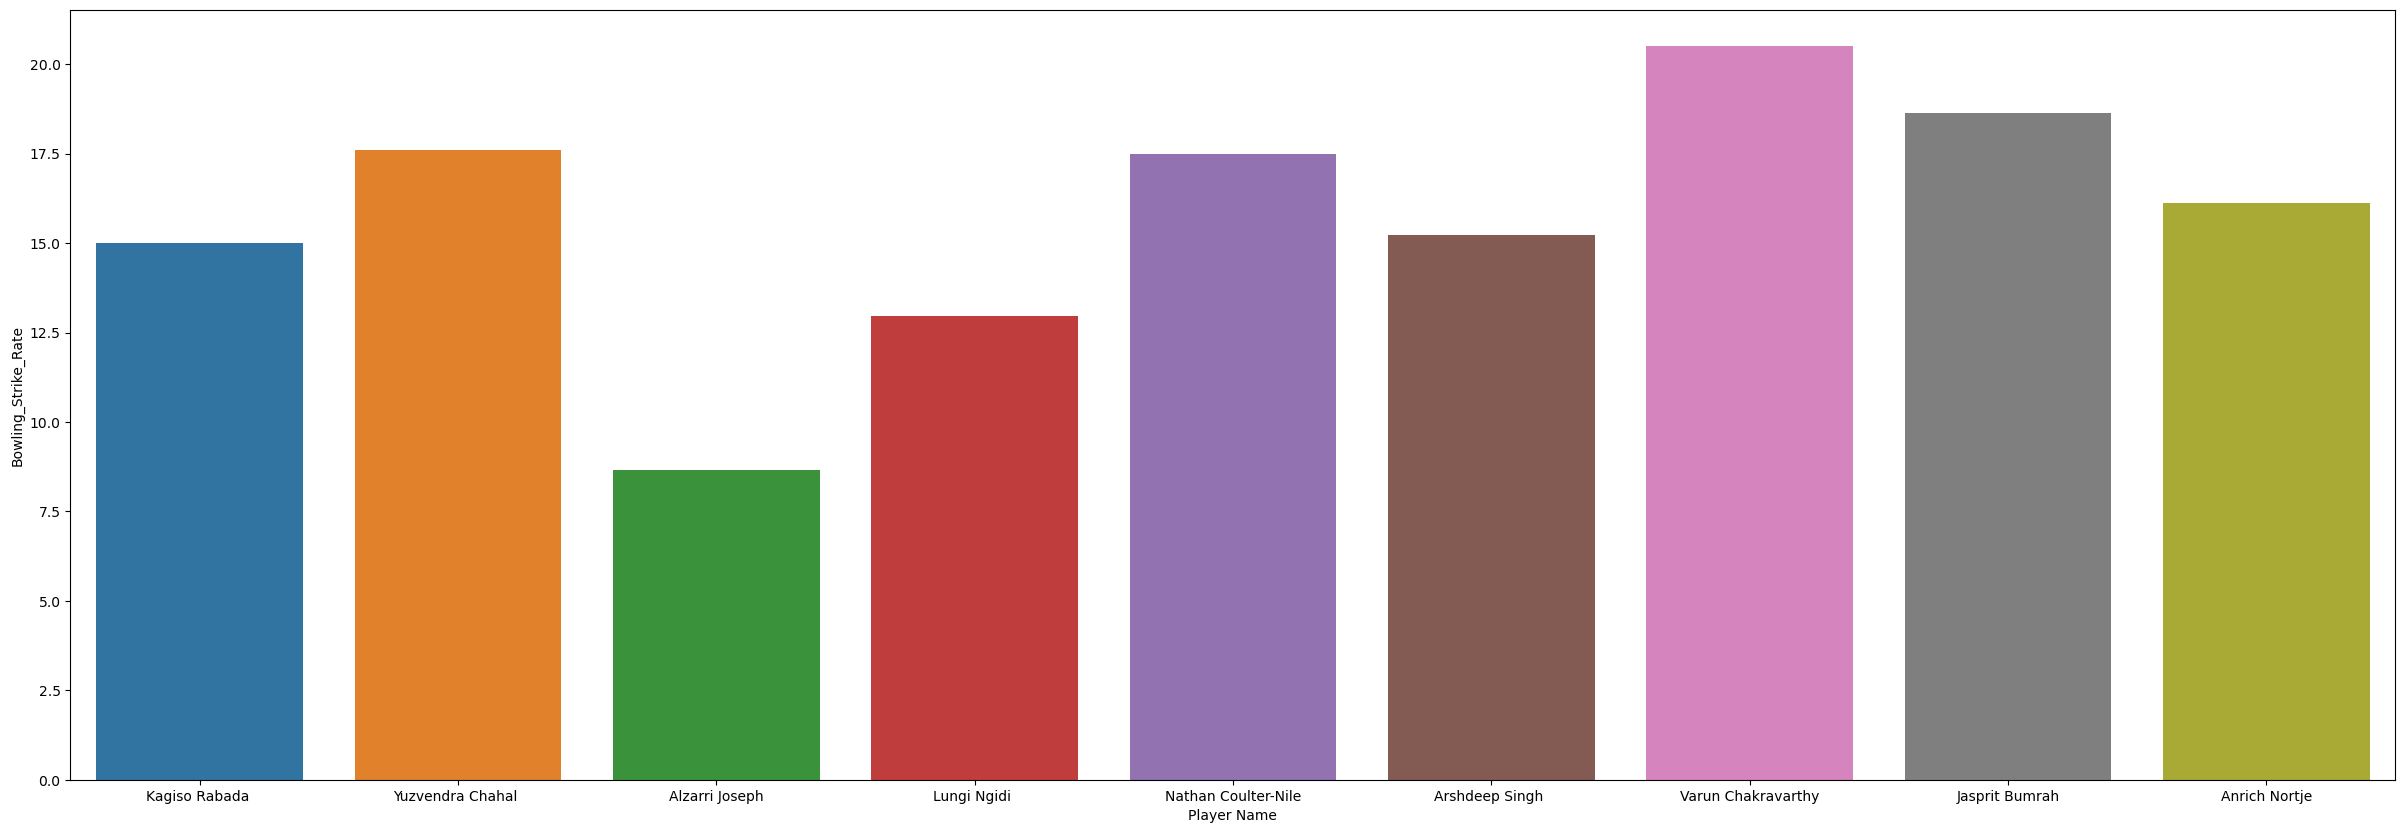

In [36]:
# Visualization for Bowler's Strike Rate
# Less means good
plt.figure(figsize=(30,10))
sns.barplot(x="Player Name", y="Bowling_Strike_Rate", data=top_bowlers)

<Axes: xlabel='Player Name', ylabel='Wickets'>

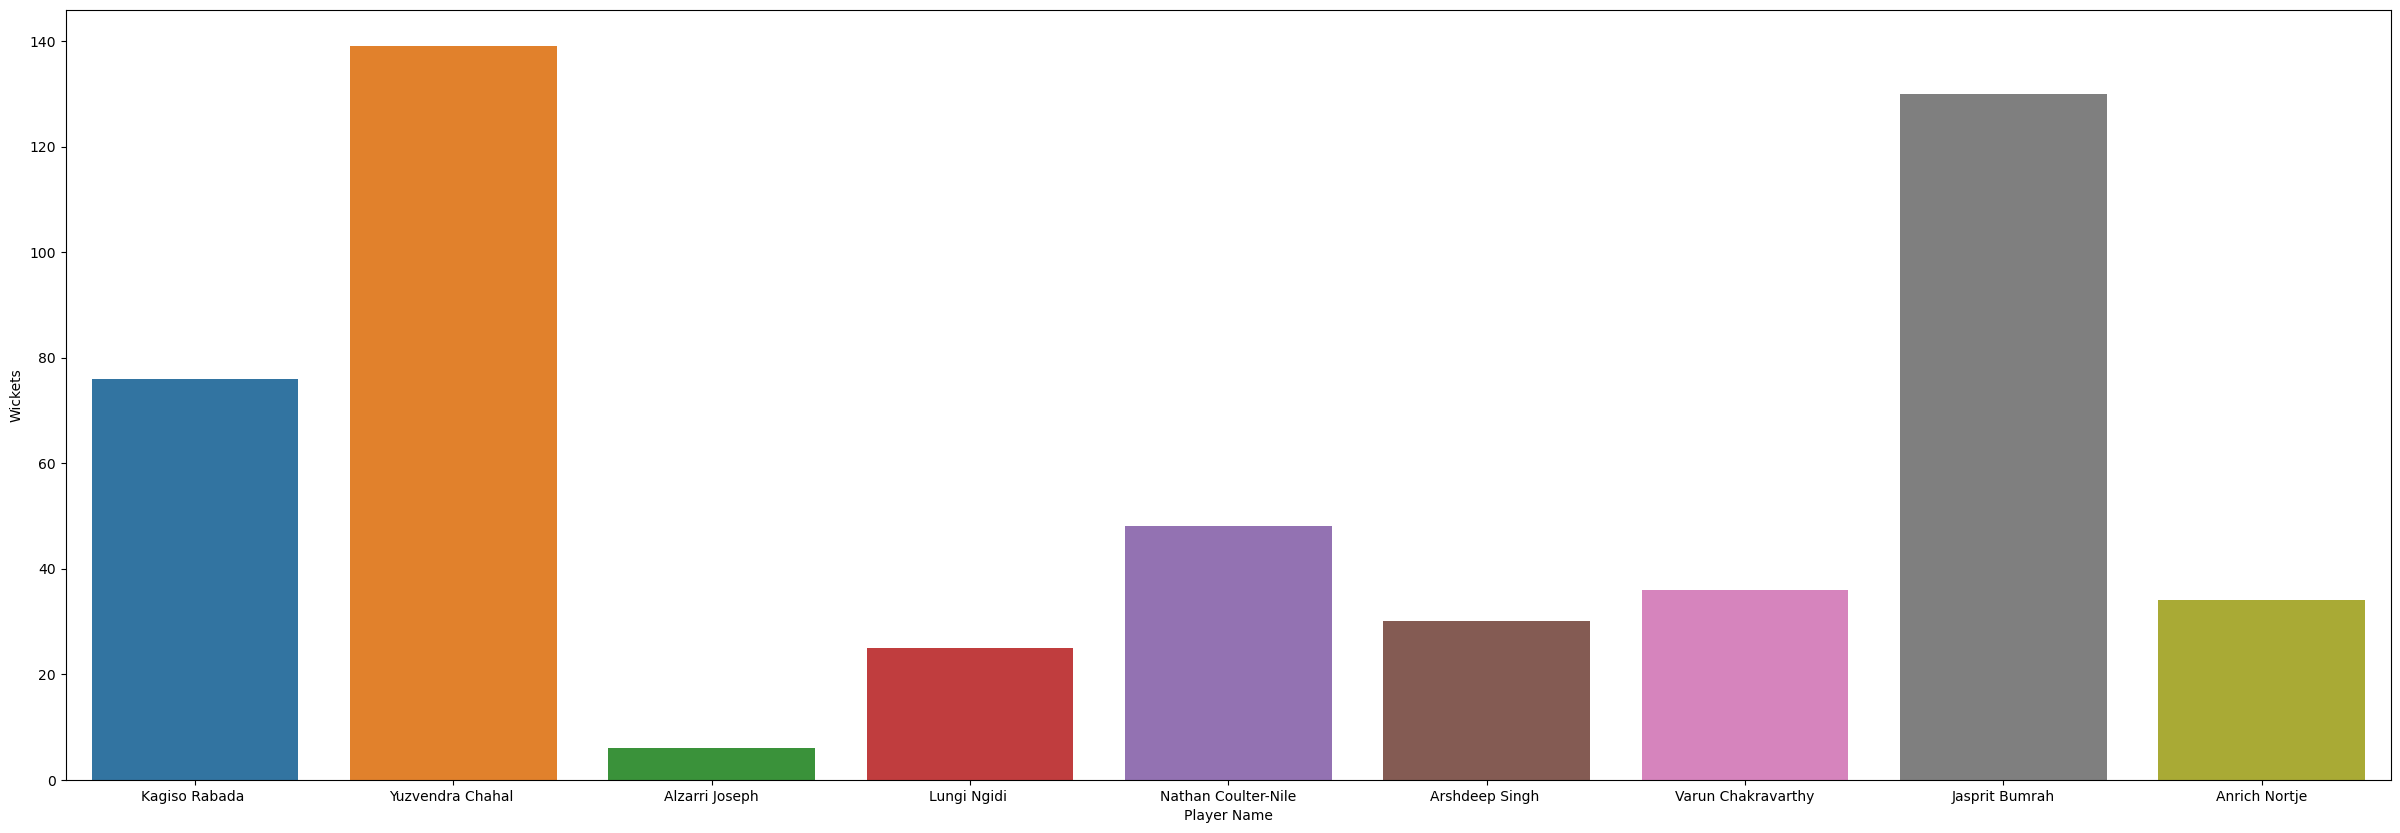

In [37]:
# Visualization for Bowler's Wickets
# More means good

plt.figure(figsize=(30,10))
sns.barplot(x="Player Name", y="Wickets", data=top_bowlers)

In [38]:
# Here are the best bowlers as per our analysis:
print("1st: " + sorted_best_bowlers[0][0])
print("2nd: " + sorted_best_bowlers[1][0])
print("3rd: " + sorted_best_bowlers[2][0])
print("4th: " + sorted_best_bowlers[3][0])
print("5th: " + sorted_best_bowlers[4][0])

1st: Kagiso Rabada 
2nd: Yuzvendra Chahal 
3rd: Nathan Coulter-Nile
4th: Lungi Ngidi 
5th: Alzarri Joseph


<Axes: xlabel='Player Name', ylabel='Runs'>

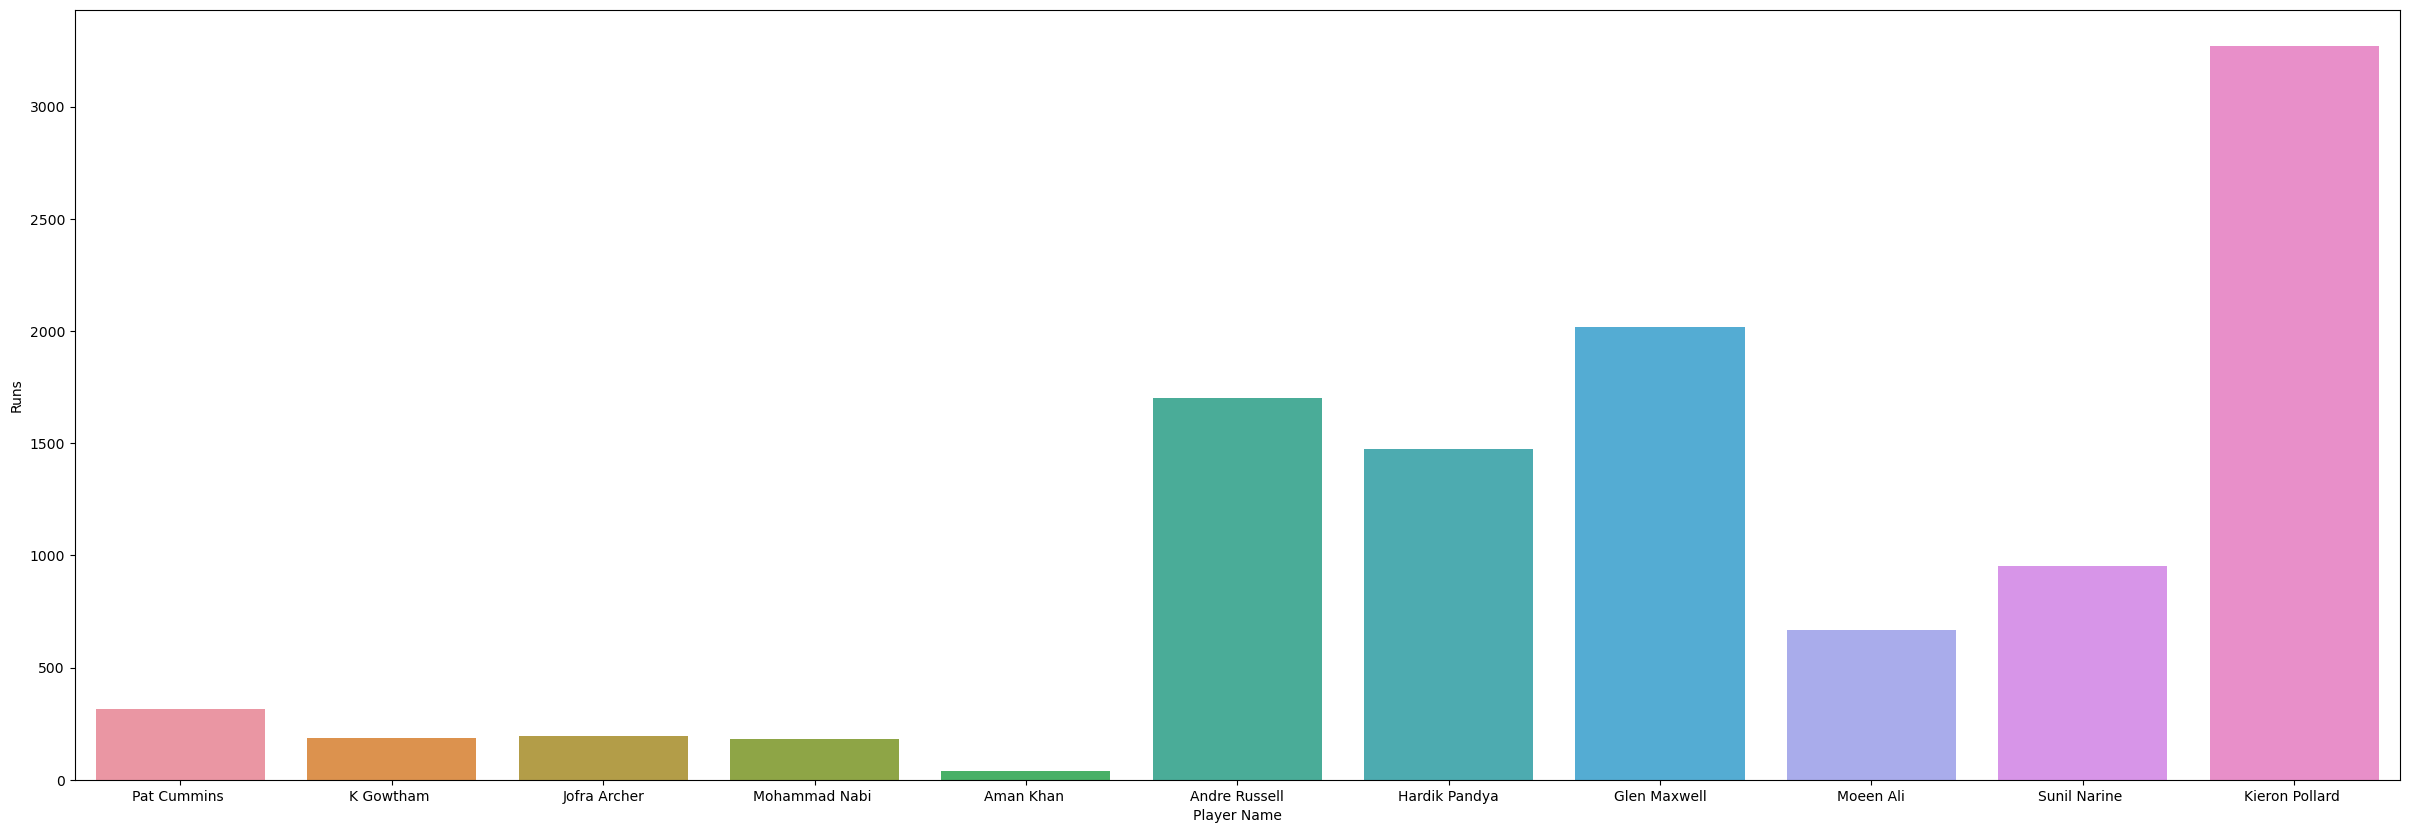

In [39]:
# Visualization for All Rounder's Runs
# More means good

plt.figure(figsize=(30,10))
sns.barplot(x="Player Name" , y="Runs", data=top_allRounders)

<Axes: xlabel='Player Name', ylabel='Strike_Rate'>

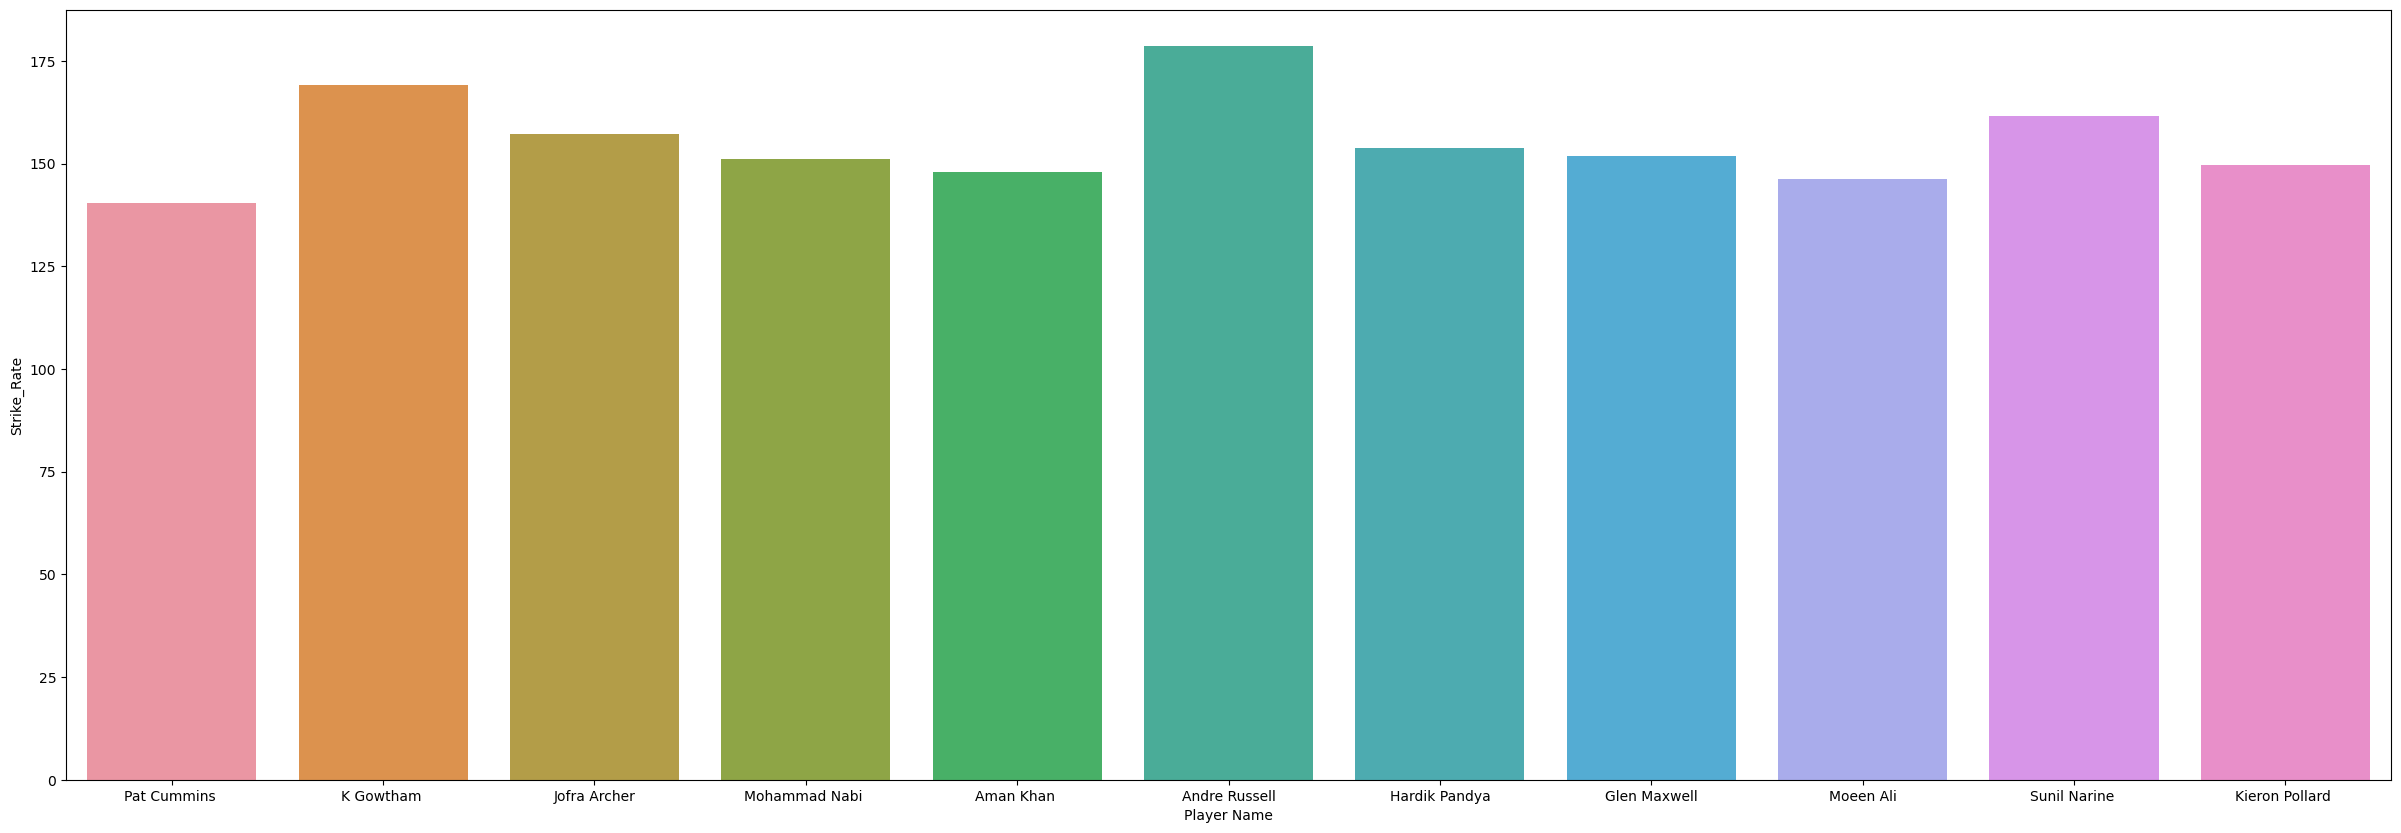

In [40]:
# Visualization for All Rounder's Batting Strike Rate
# More means Good

plt.figure(figsize=(30,10))
sns.barplot(x="Player Name", y="Strike_Rate",data=top_allRounders)

<Axes: xlabel='Player Name', ylabel='Average'>

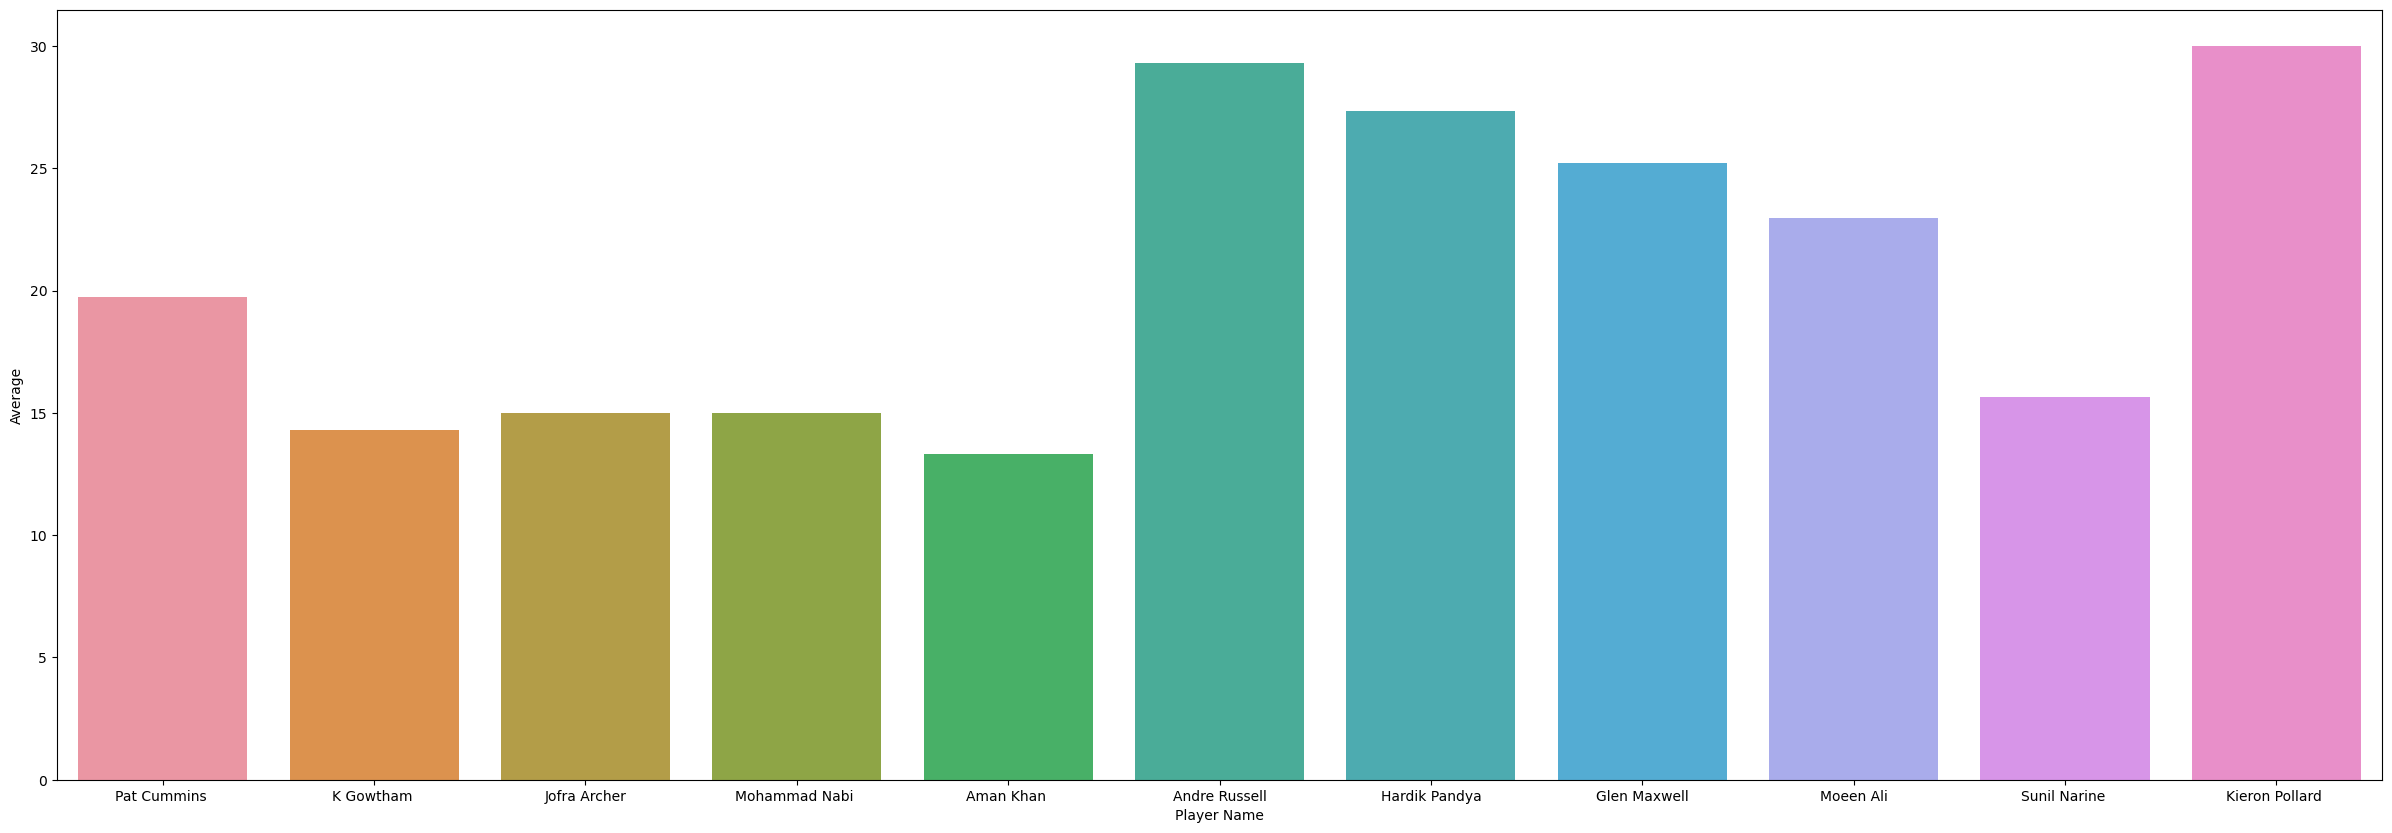

In [41]:
# Visualization for All Rounder's Batting Average
# More means good
plt.figure(figsize=(30,10))
sns.barplot(x="Player Name", y="Average", data=top_allRounders)

<Axes: xlabel='Player Name', ylabel='Wickets'>

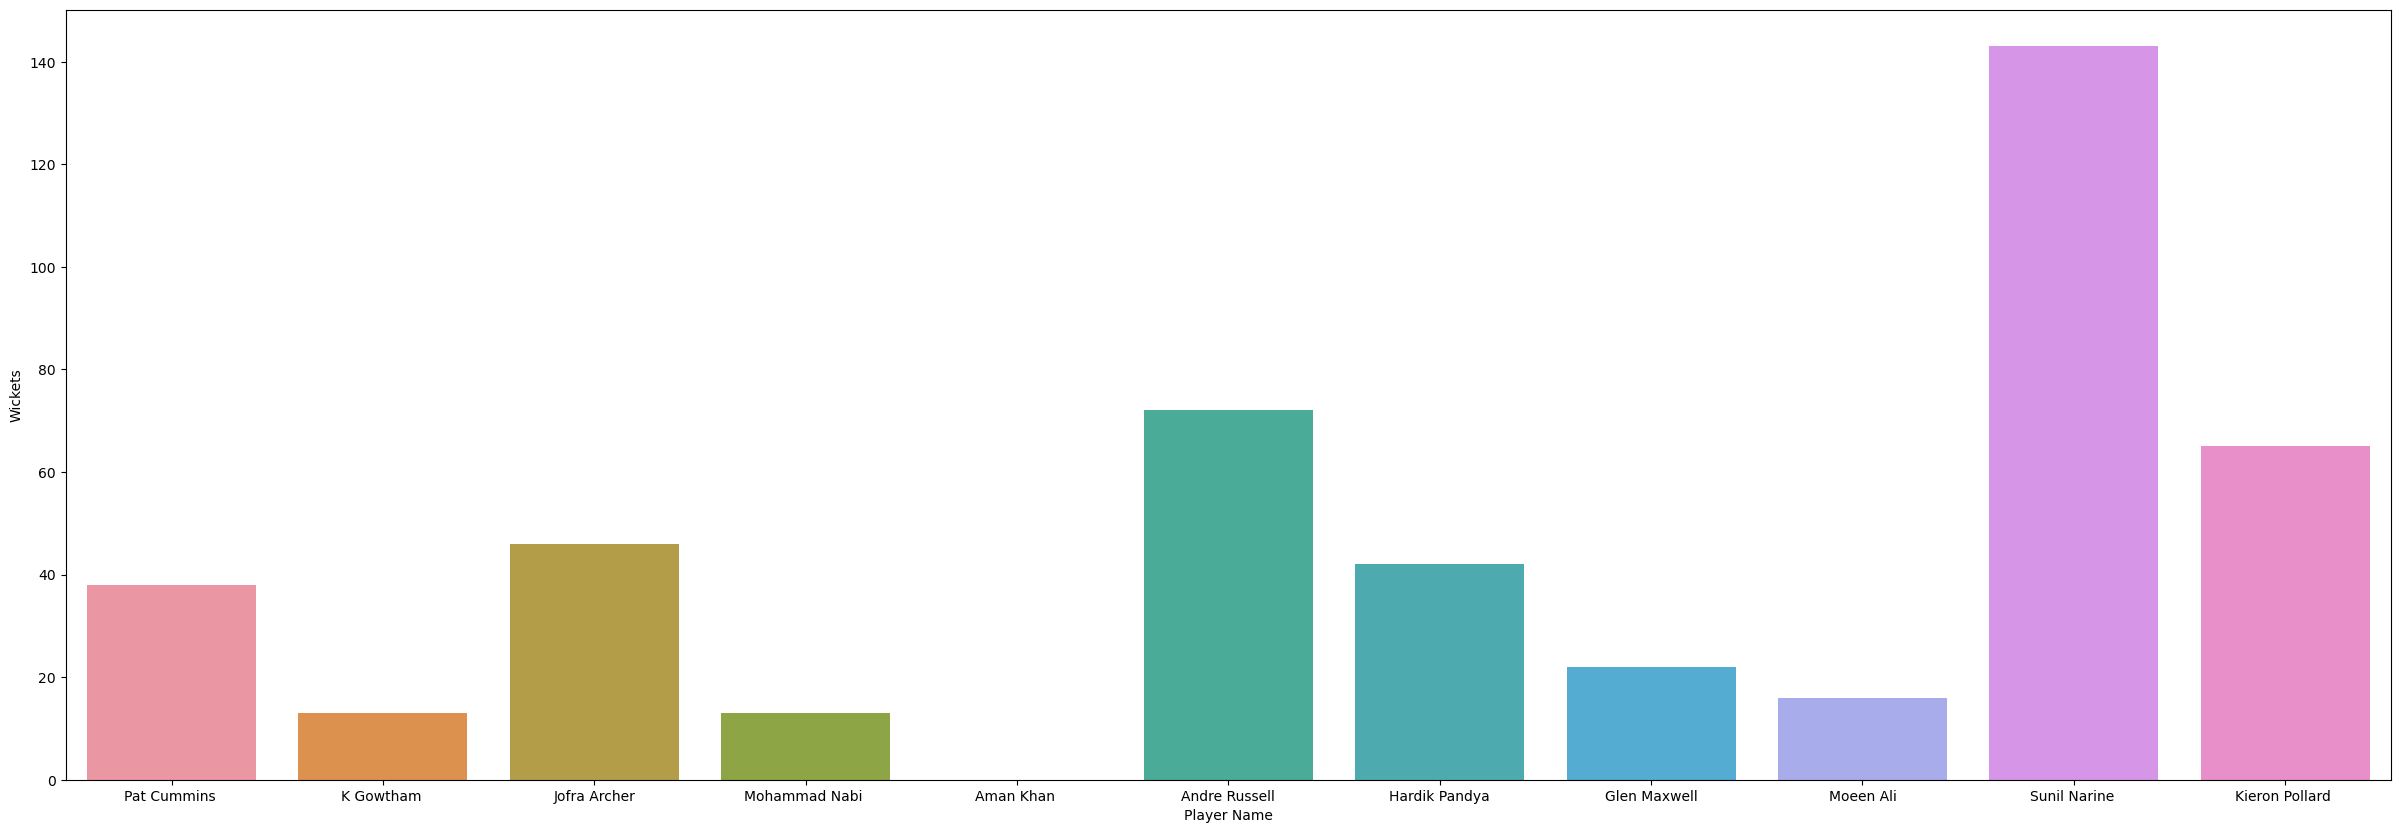

In [42]:
# Visualization for All Rounder's Wickets
# More means good
plt.figure(figsize=(30,10))
sns.barplot(x="Player Name", y="Wickets",data=top_allRounders)

<Axes: xlabel='Player Name', ylabel='Bowling_Strike_Rate'>

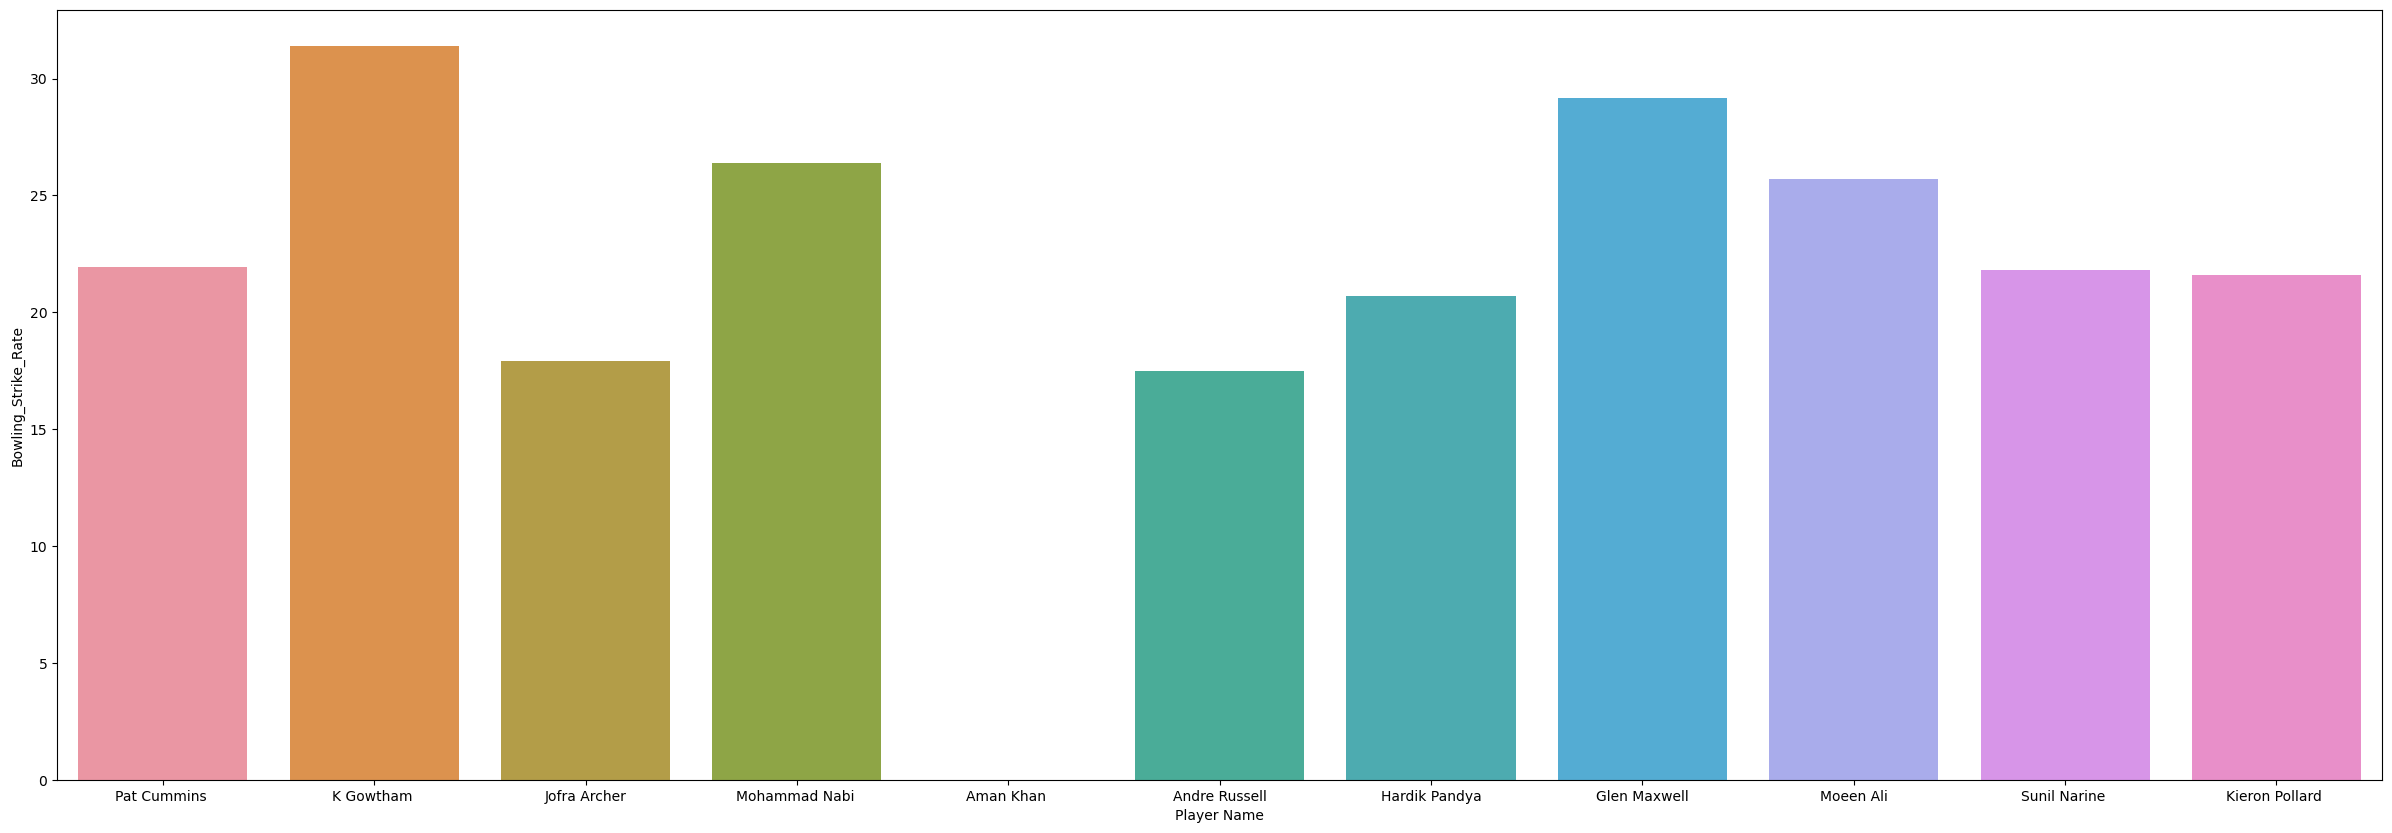

In [43]:
# Visualization for All Rounder's Bowling Strike Rate
# Less means good
plt.figure(figsize=(30,10))
sns.barplot(x="Player Name",y="Bowling_Strike_Rate",data=top_allRounders)

<Axes: xlabel='Player Name', ylabel='Bowling_average'>

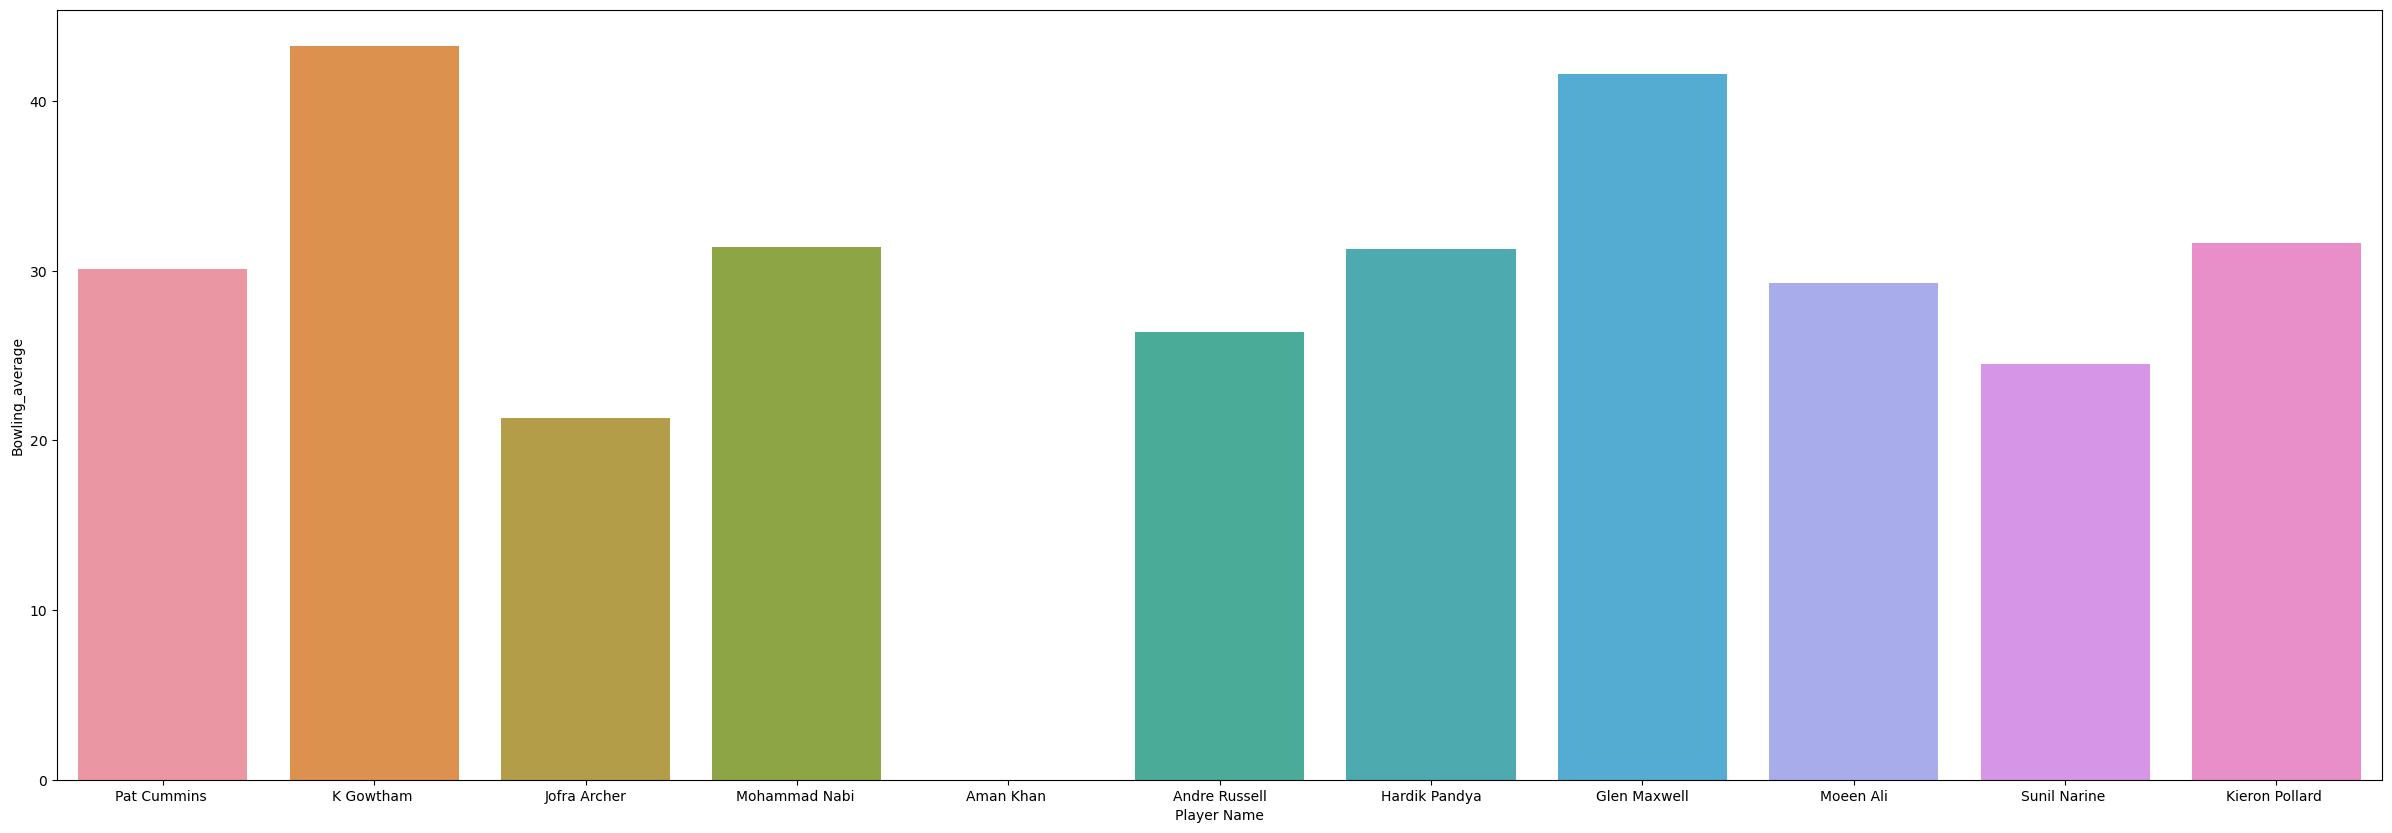

In [44]:
# Visualization for All Rounder's Average
# Less means good
plt.figure(figsize=(30,10))
sns.barplot(x="Player Name", y="Bowling_average", data=top_allRounders)

<Axes: xlabel='Player Name', ylabel='Economy'>

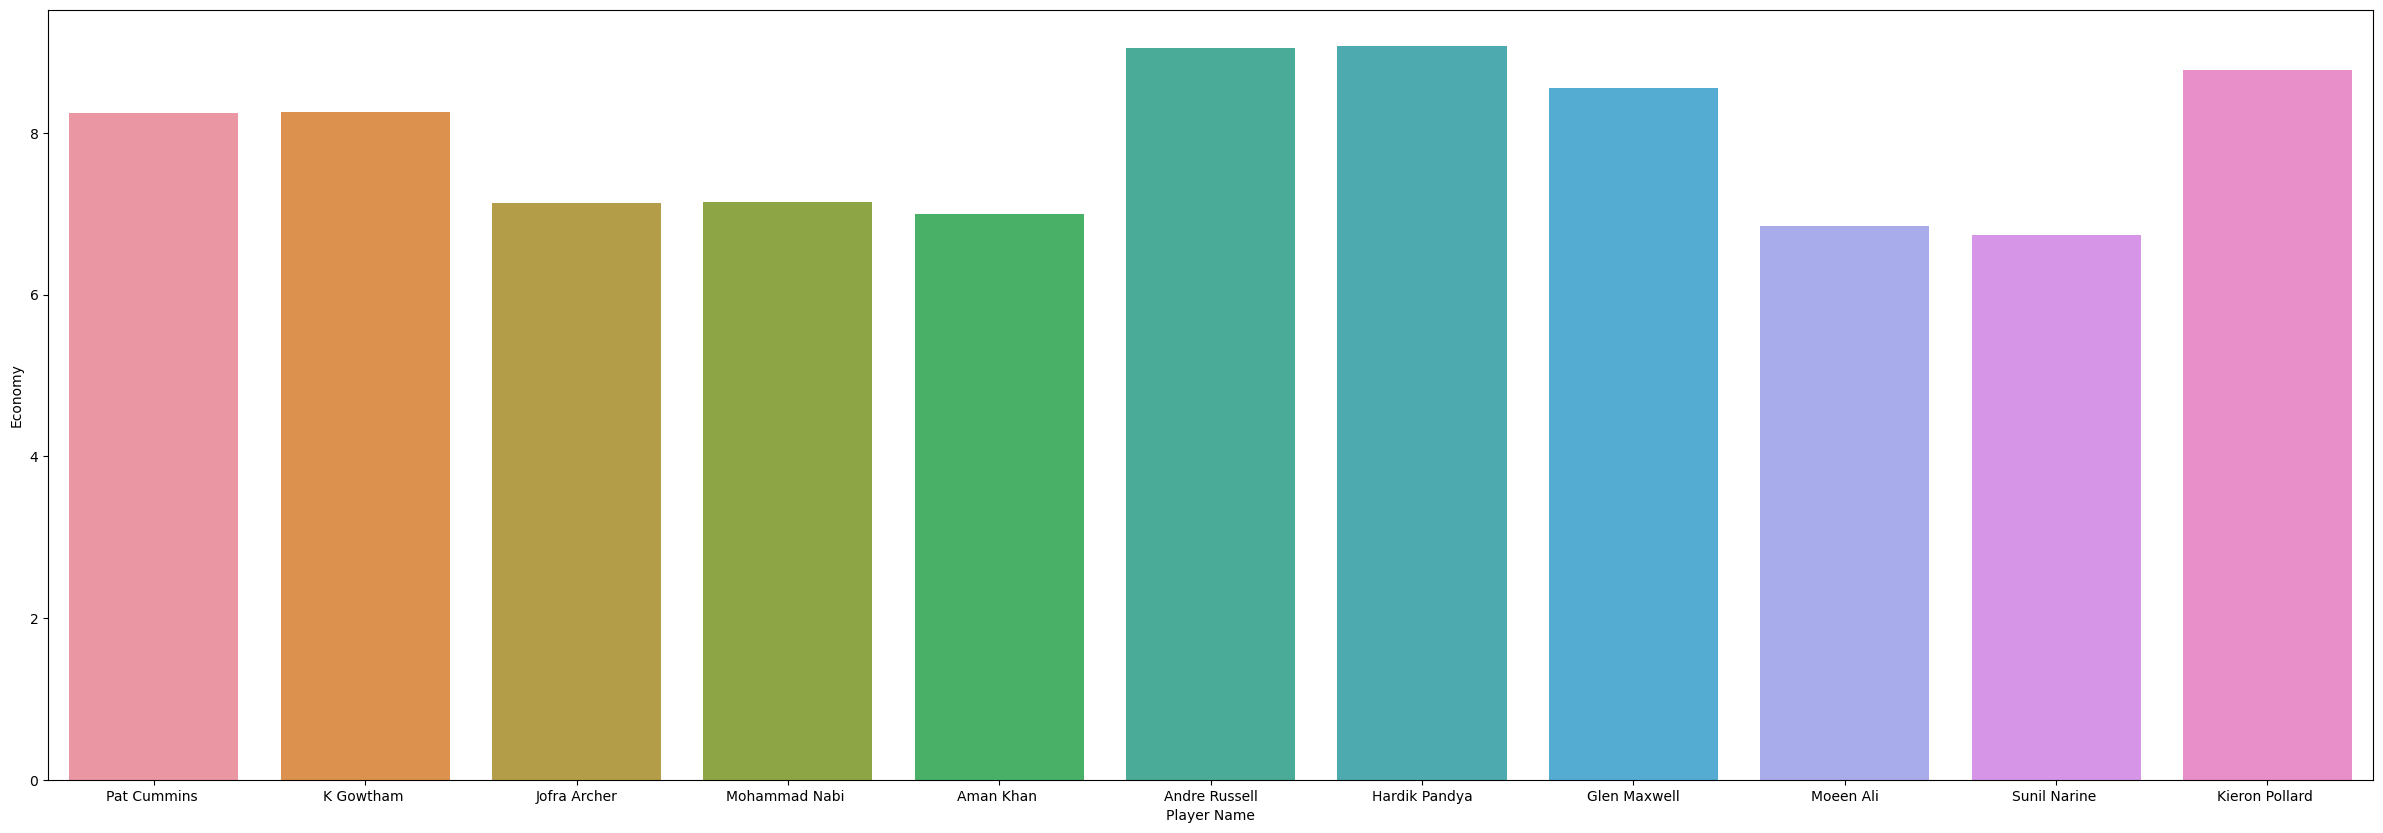

In [45]:
# Visualization for All Rounder's Economy
# Less means Good
plt.figure(figsize=(30,10))
sns.barplot(x="Player Name", y="Economy", data=top_allRounders)

In [46]:
# Here are the best All rounders as per our analysis:
print("1st: "+sorted_best_all_rounders[0][0])
print("2nd: "+sorted_best_all_rounders[1][0])
print("3rd: "+sorted_best_all_rounders[2][0])
print("4th: "+sorted_best_all_rounders[3][0])
print("5th: "+sorted_best_all_rounders[4][0])

1st: Andre Russell
2nd: Sunil Narine 
3rd: Jofra Archer
4th: Kieron Pollard 
5th: Hardik Pandya


<Axes: xlabel='Player Name', ylabel='Runs'>

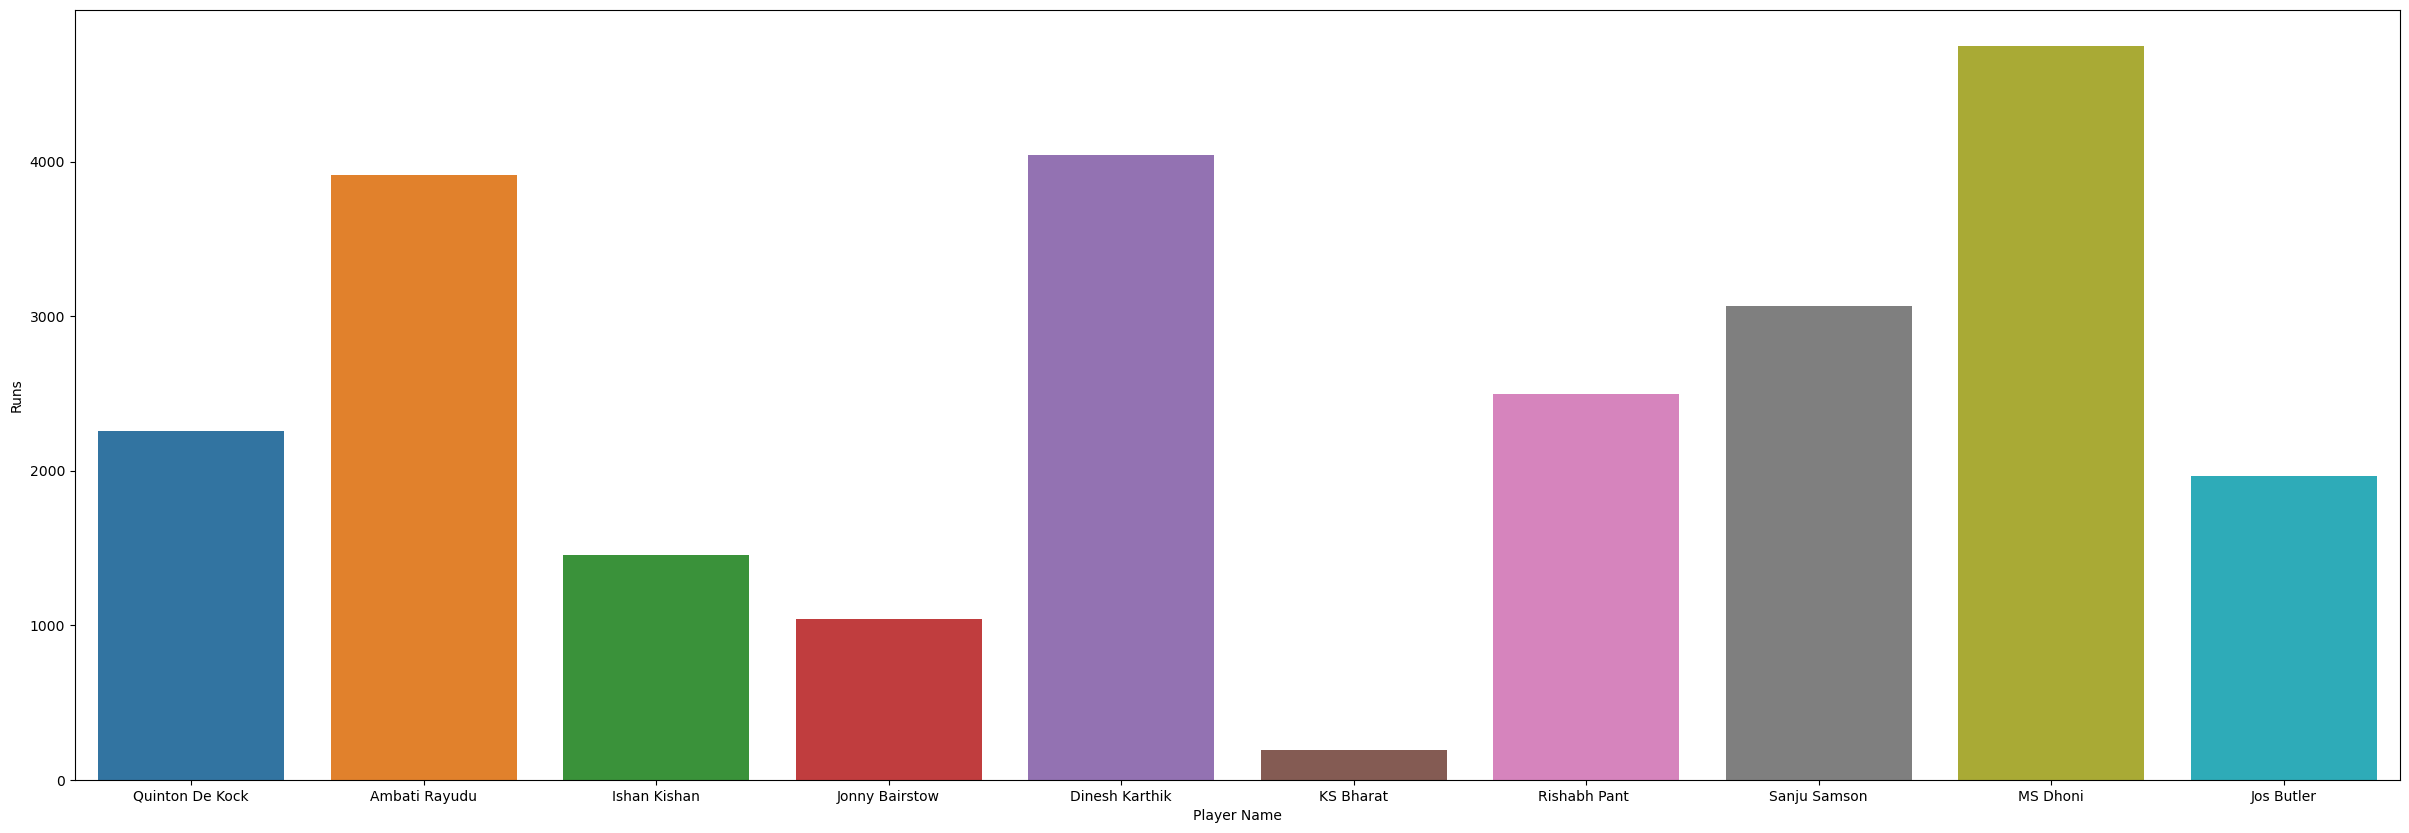

In [47]:
# Visualization for Keeper's Runs
# more means Good
plt.figure(figsize=(30,10))
sns.barplot(x="Player Name", y="Runs",data=top_keepers)

<Axes: xlabel='Player Name', ylabel='Average'>

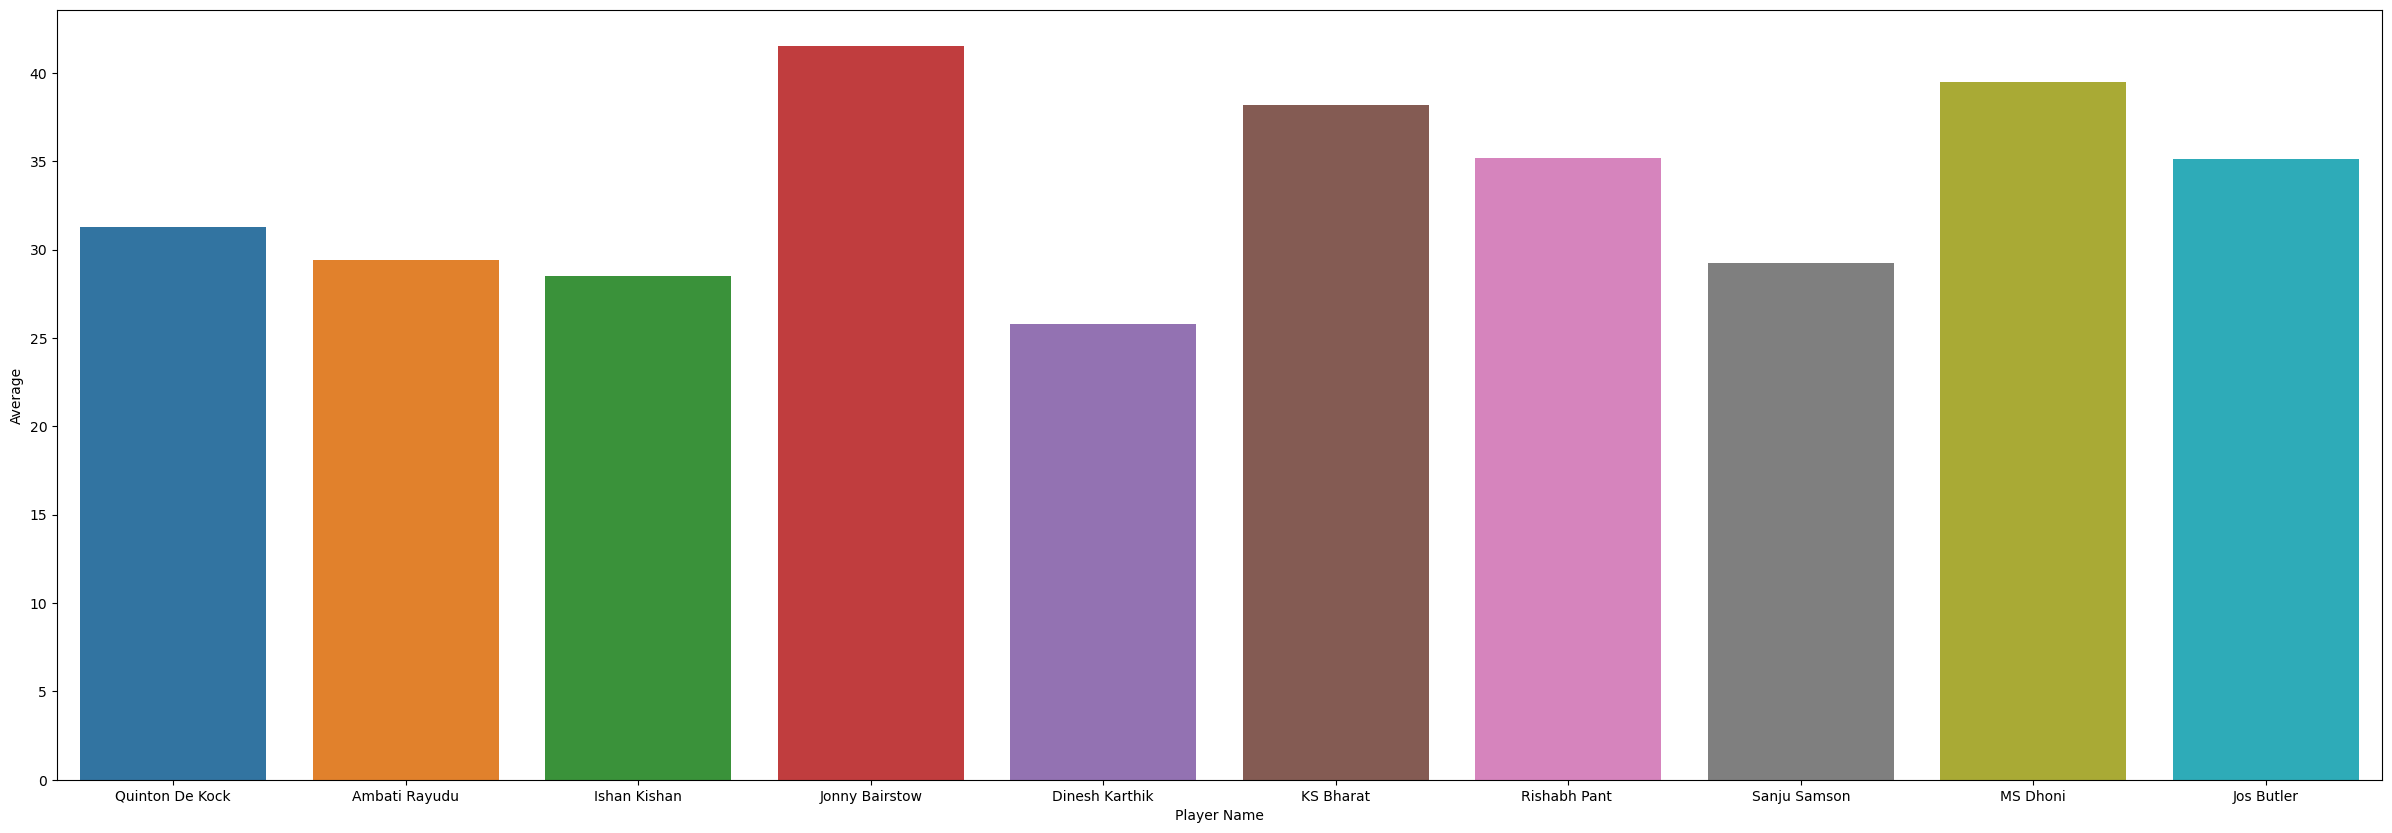

In [48]:
# Visualization for Keeper's Batting Average
# more means Good
plt.figure(figsize=(30,10))
sns.barplot(x="Player Name", y="Average",data=top_keepers)

<Axes: xlabel='Player Name', ylabel='Strike_Rate'>

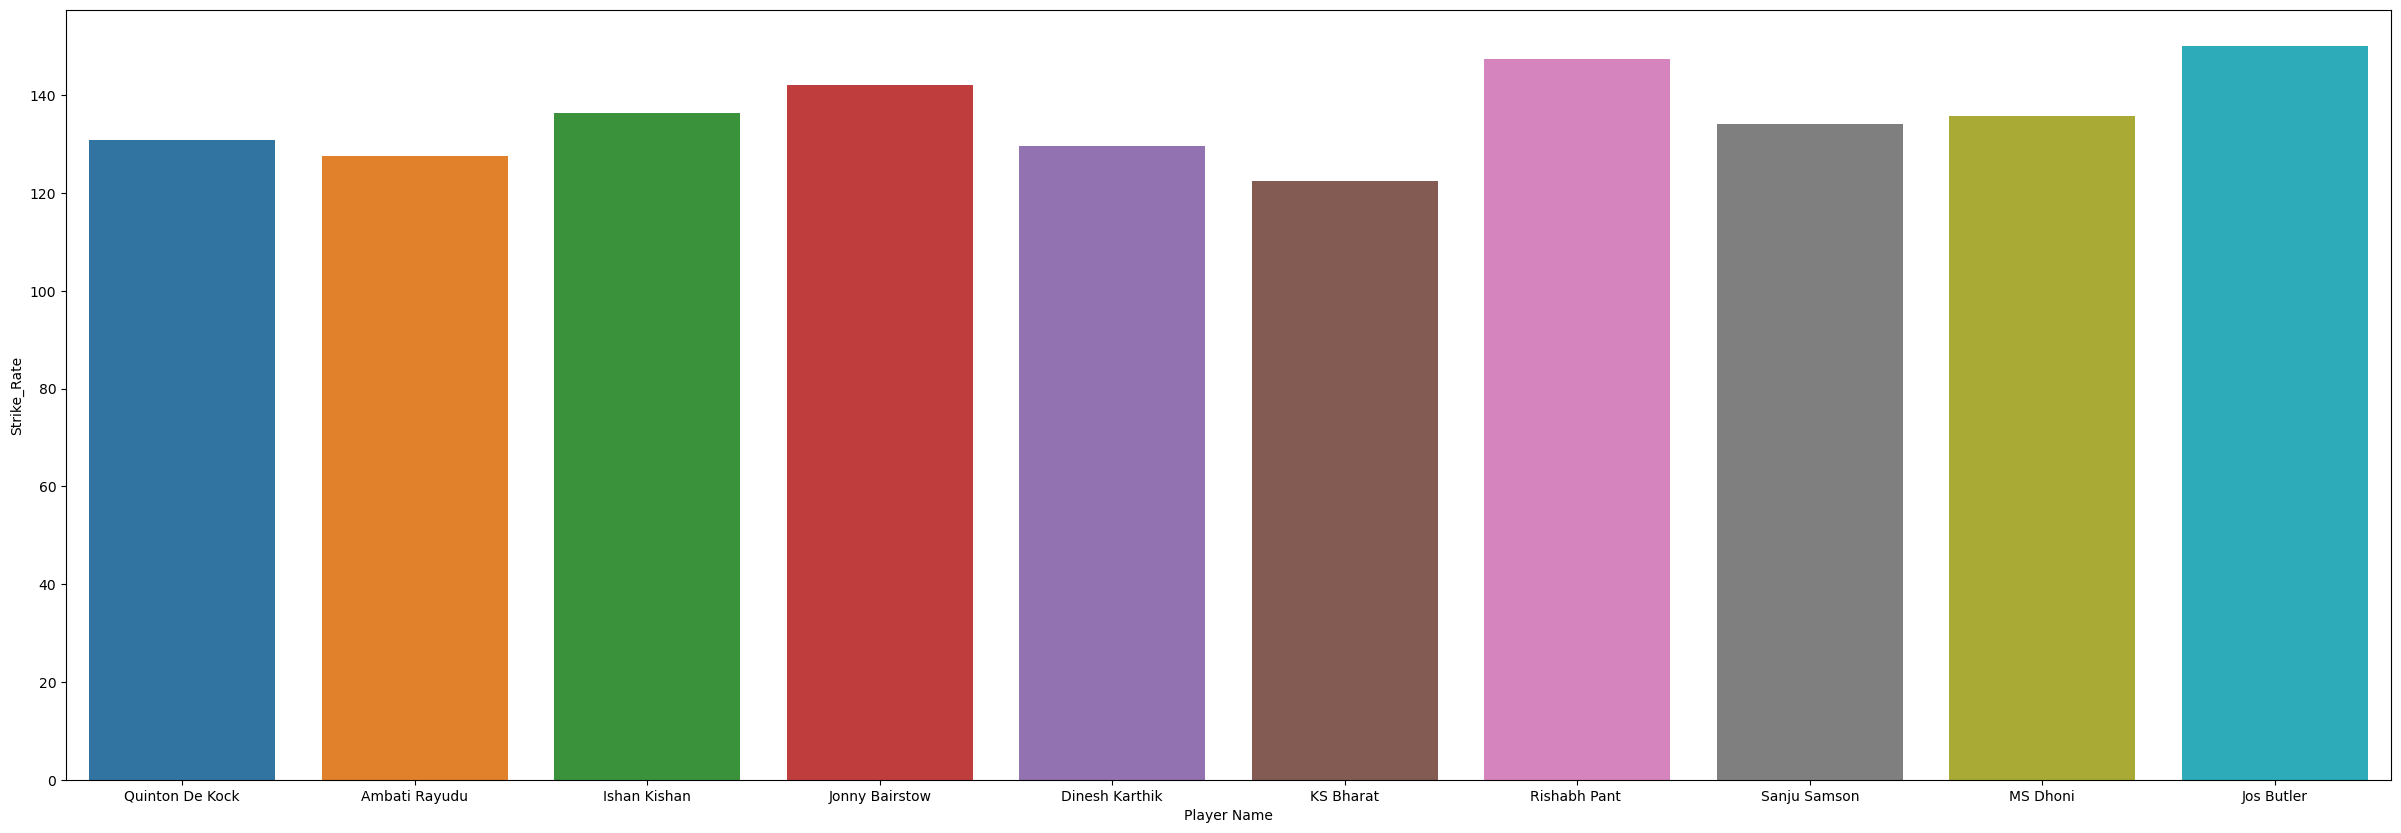

In [49]:
# Visualization for Keeper's Batting Strike Rate
# more means Good
plt.figure(figsize=(30,10))
sns.barplot(x="Player Name", y="Strike_Rate",data=top_keepers)

<Axes: xlabel='Player Name', ylabel='Catches'>

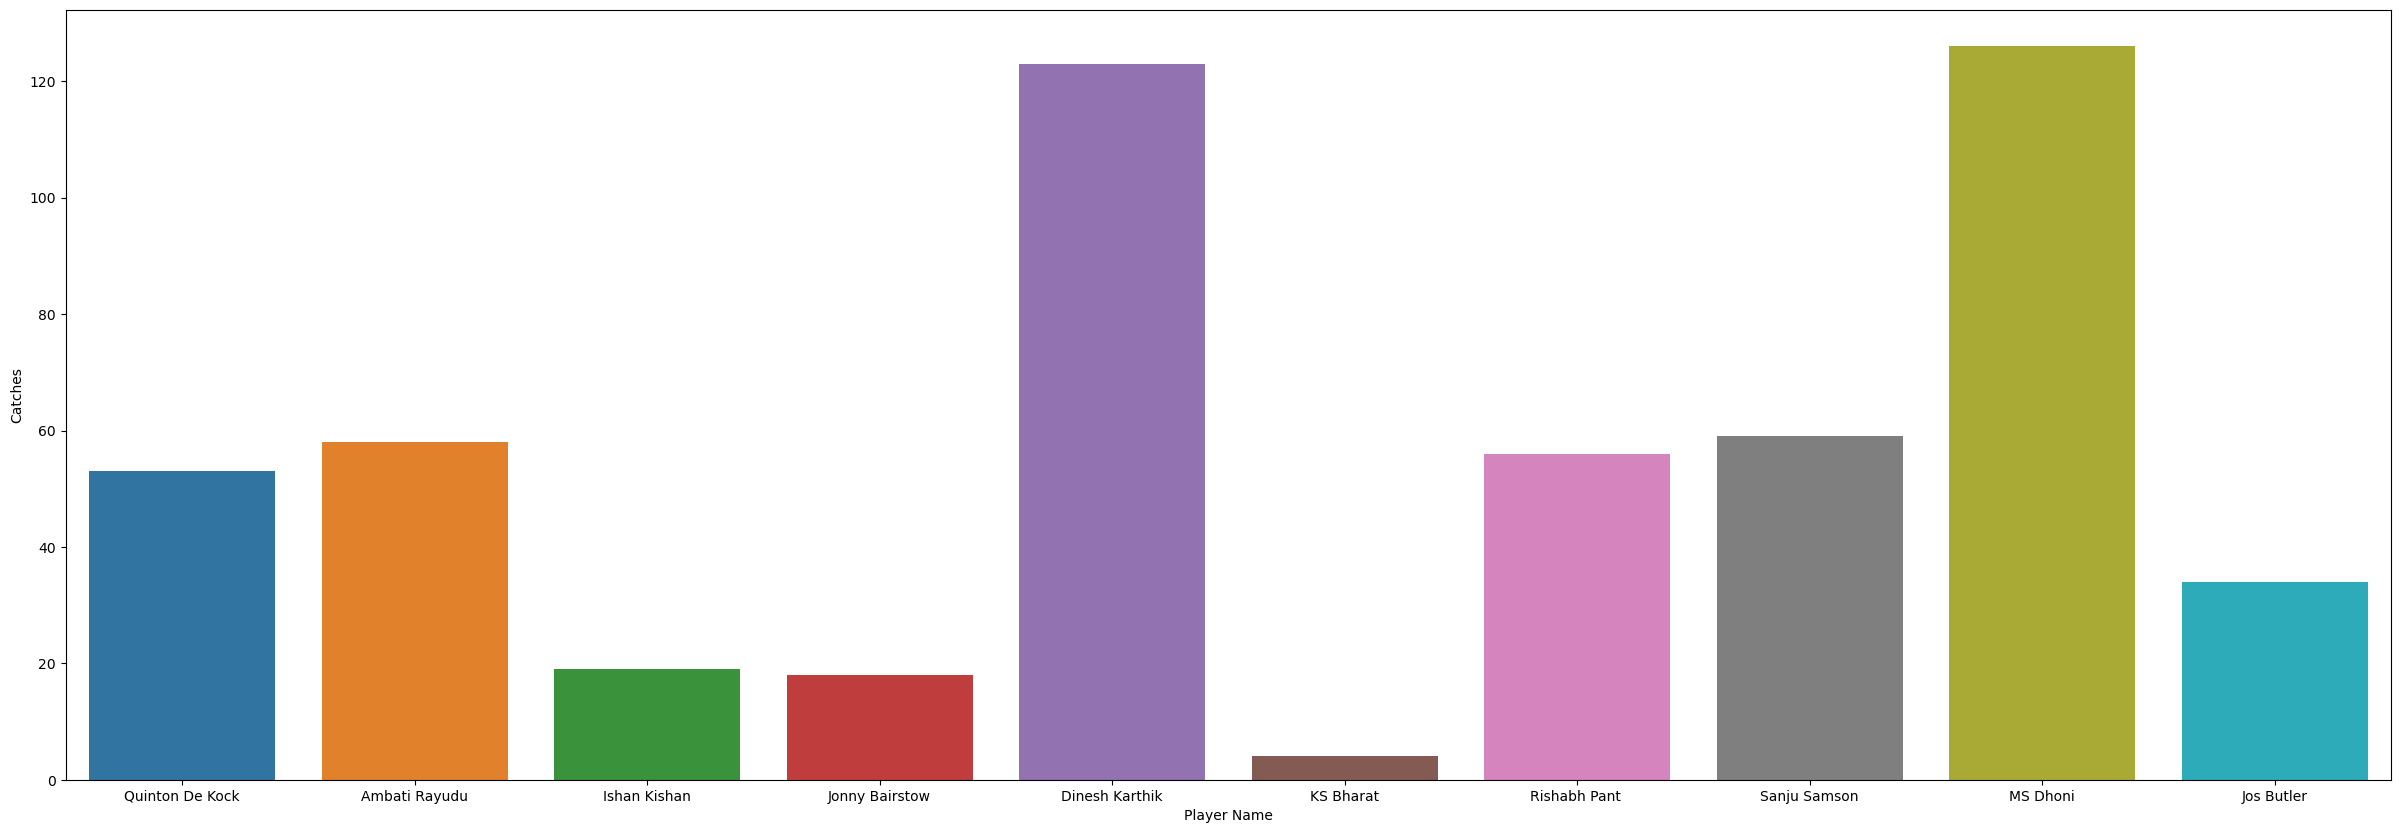

In [50]:
# Visualization for Keeper's Catches
# more means Good
plt.figure(figsize=(30,10))
sns.barplot(x="Player Name", y="Catches",data=top_keepers)

<Axes: xlabel='Player Name', ylabel='Run_outs'>

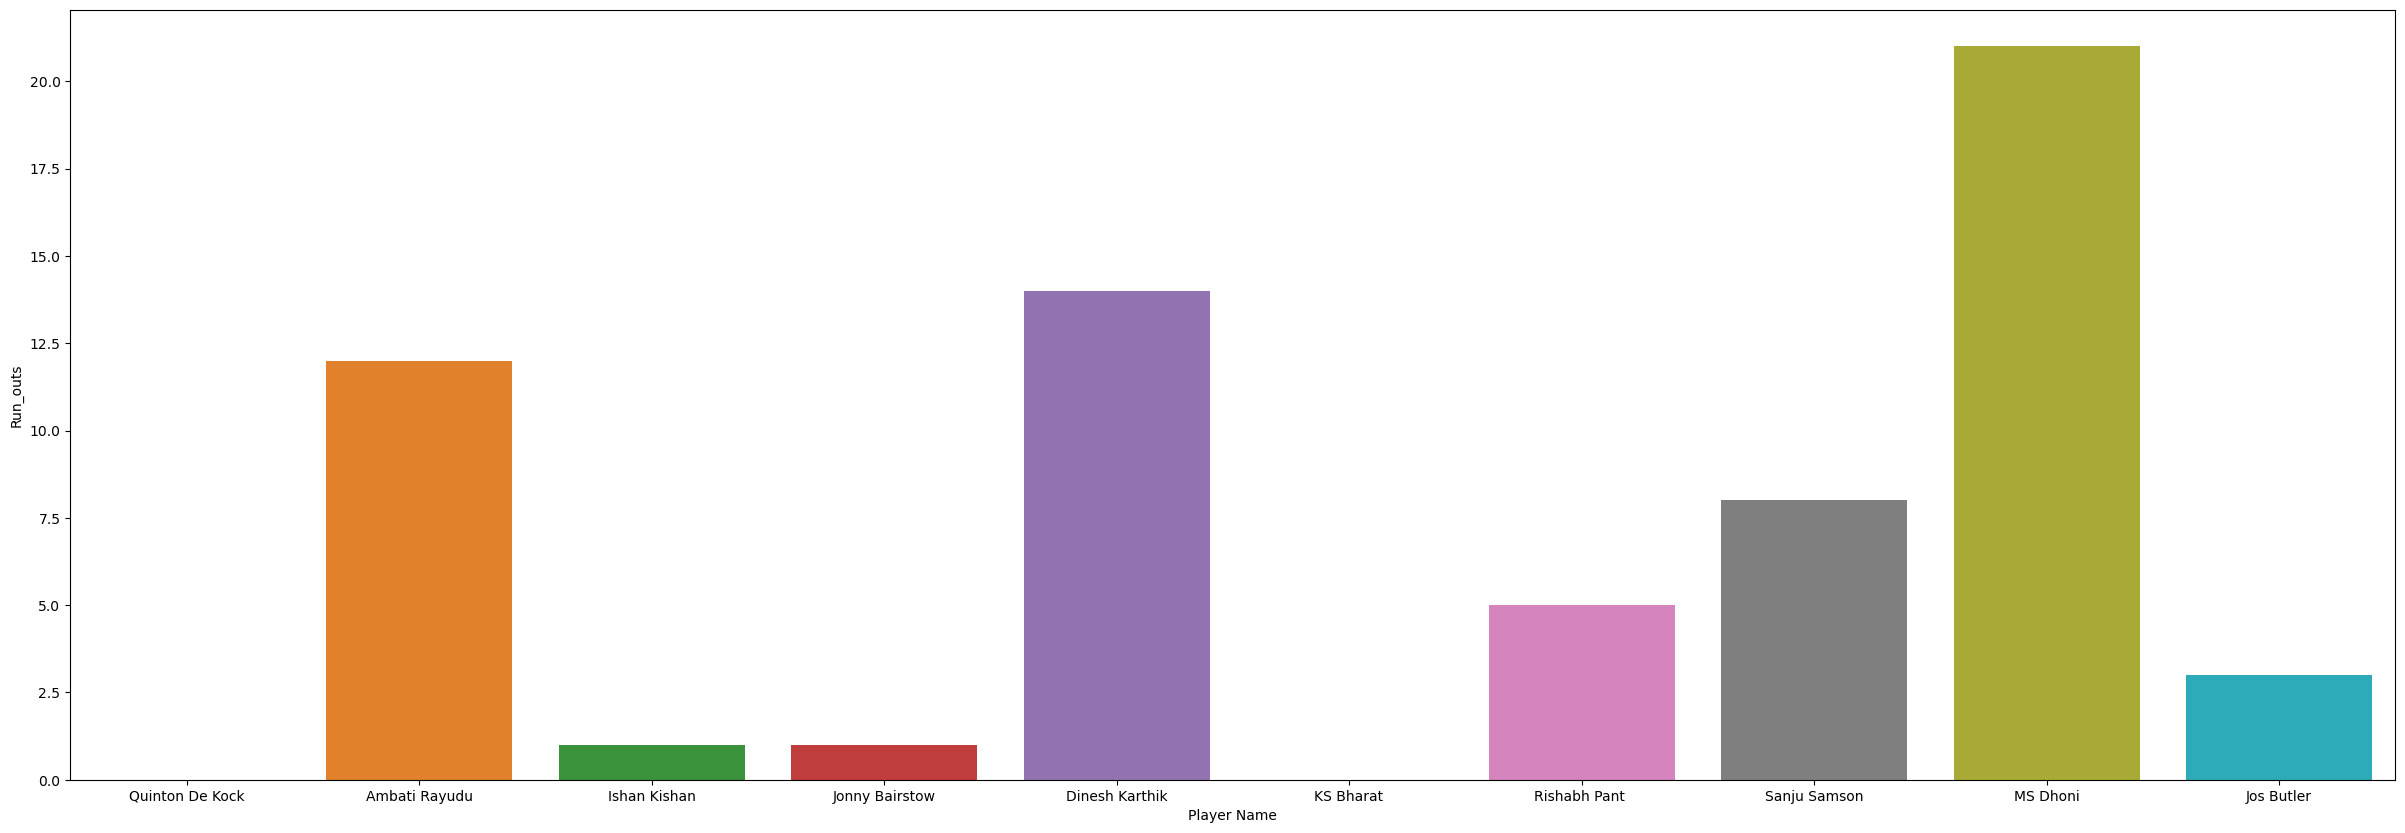

In [51]:
# Visualization for Keeper's Run outs
# more means Good
plt.figure(figsize=(30,10))
sns.barplot(x="Player Name", y="Run_outs",data=top_keepers)

<Axes: xlabel='Player Name', ylabel='Stumps'>

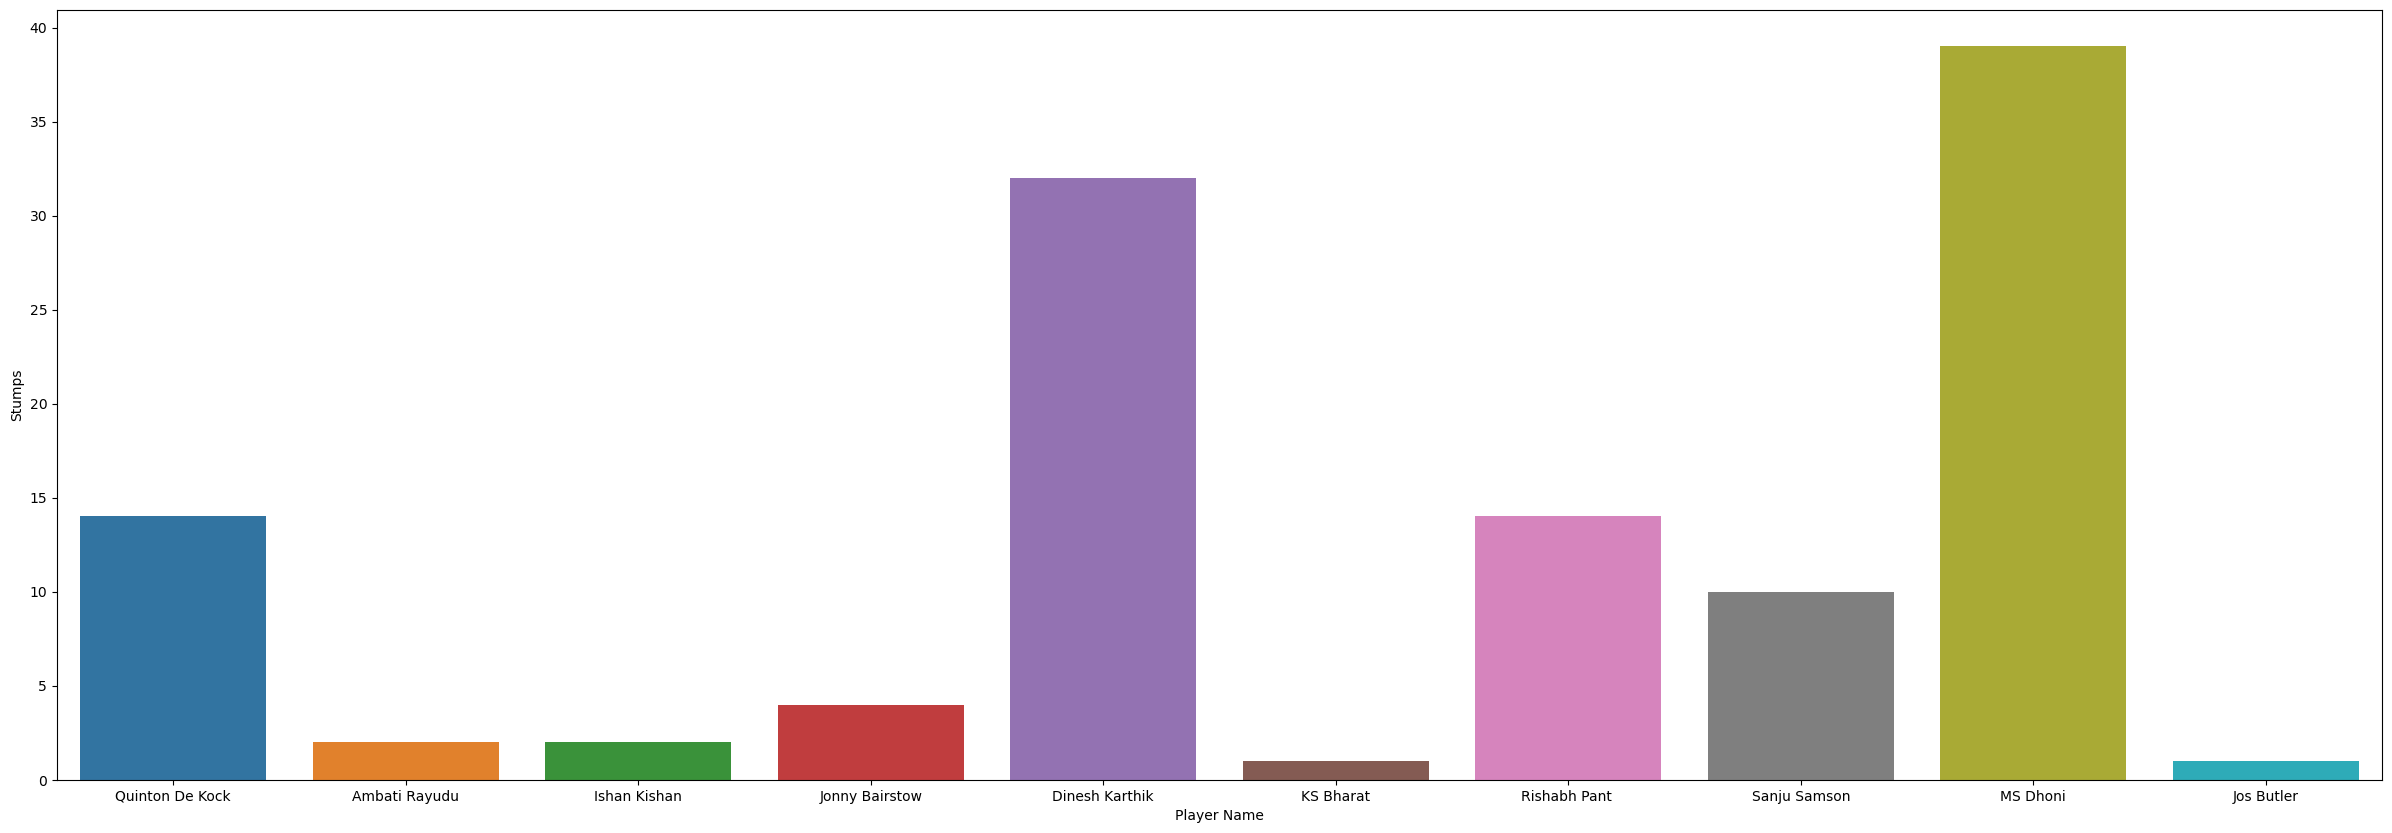

In [52]:
# Visualization for Keeper's Stumps
# more means Good
plt.figure(figsize=(30,10))
sns.barplot(x="Player Name", y="Stumps",data=top_keepers)

In [53]:
# Here are the best keepers as per our analysis:
print("1st: "+ sorted_best_keepers[0][0])
print("2nd: "+ sorted_best_keepers[1][0])
print("3rd: "+ sorted_best_keepers[2][0])
print("4th: "+ sorted_best_keepers[3][0])

1st: MS Dhoni
2nd: Rishabh Pant 
3rd: Dinesh Karthik
4th: Sanju Samson


<h1>Making our best 11 from the above Analysis</h1>
<h4>
    <ol>
        <li>
            We will consider the number of players from each category that the t20 World Cup winning and the last year's
            IPL winning team played in their Final matches.
        </li>
        <li>
            The Australia squad consisted of - 3 Batters, 3 Allrounders, 4 Bowlers with 1 spin option and 1 wicket keeper.
        </li>
        <li>
            The Chennai Squad consisted of - 4 Batters, 3 Allrounders, 3 Bowlers and 1 Wicket Keeper. 
        </li>
        <li>
           For our final analysis we will consider the ratio of players in the best 11 as follows:
           <ol>
                <li>
                    "3" batters
                </li>
                <li>
                    "3" All rounders
                </li>
                <li>
                    "4" Bowlers with 2 Spin Options
                </li>
                <li>
                    "1" Wicket Keeper
                </li>
           </ol> 
        </li>
    </ol>
</h4>

<h1 style="color: white">Top Batters</h1>

In [200]:
kl_Rahul = top_batters[top_batters["Player Name"] == sorted_best_batters[0][0]]
virat_Kohli = top_batters[top_batters["Player Name"] == sorted_best_batters[4][0]]
david_Warner = top_batters[top_batters["Player Name"] == sorted_best_batters[1][0]]

matches_values = [
    (kl_Rahul["Matches_Played"].tolist())[0],
    (virat_Kohli["Matches_Played"].tolist())[0],
    (david_Warner["Matches_Played"].tolist())[0],
]

runs_values = [
    (kl_Rahul["Runs"].tolist())[0],
    (virat_Kohli["Runs"].tolist()[0]),
    (david_Warner["Runs"].tolist()[0]),
]

average_values = [
    (kl_Rahul["Average"].tolist())[0],
    (virat_Kohli["Average"].tolist()[0]),
    (david_Warner["Average"].tolist()[0]),
]

strike_rate_values = [
    (kl_Rahul["Strike_Rate"].tolist())[0],
    (virat_Kohli["Strike_Rate"].tolist())[0],
    (david_Warner["Strike_Rate"].tolist())[0]
]

labels_batters = [sorted_best_batters[0][0],sorted_best_batters[4][0],sorted_best_batters[1][0]]

<Axes: title={'center': 'Strike Rate'}>

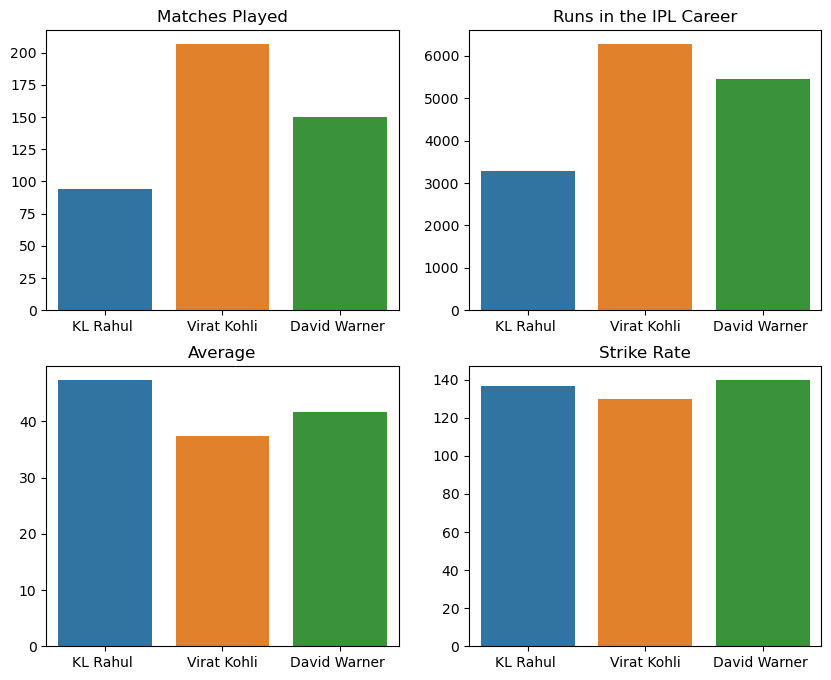

In [201]:
fig, axes = plt.subplots(2,2, figsize=(10,8))
axes[0][0].set_title("Matches Played")
axes[0][1].set_title("Runs in the IPL Career")
axes[1][0].set_title("Average")
axes[1][1].set_title("Strike Rate")
sns.barplot(x=labels_batters, y=matches_values, ax=axes[0][0])
sns.barplot(x=labels_batters, y=runs_values, ax=axes[0][1])
sns.barplot(x=labels_batters, y=average_values, ax=axes[1][0])
sns.barplot(x=labels_batters, y=strike_rate_values, ax=axes[1][1])

<h1 style="color: white">Top AllRounders</h1>
<h4 style="color: teal">
    <ol>
        <li>Andre Russell</li>
        <li>Sunil Narine</li>
        <li>Hardik Pandya</li>
    </ol>
</h4>

In [202]:
andre_russel = top_allRounders[top_allRounders["Player Name"]==sorted_best_all_rounders[0][0]]
sunil_narine = top_allRounders[top_allRounders["Player Name"]==sorted_best_all_rounders[1][0]]
hardik_pandya = top_allRounders[top_allRounders["Player Name"]==sorted_best_all_rounders[4][0]]

matches_values_allrounders = [
    (andre_russel["Matches_Played"].tolist())[0],
    (sunil_narine["Matches_Played"].tolist())[0],
    (hardik_pandya["Matches_Played"].tolist())[0]
]

runs_values_allrounders = [
    (andre_russel["Runs"].tolist())[0],
    (sunil_narine["Runs"].tolist())[0],
    (hardik_pandya["Runs"].tolist())[0]
]

average_values_allrounders = [
    (andre_russel["Average"].tolist())[0],
    (sunil_narine["Average"].tolist())[0],
    (hardik_pandya["Average"].tolist())[0]
]

strike_rate_values_allrounders = [
    (andre_russel["Strike_Rate"].tolist())[0],
    (sunil_narine["Strike_Rate"].tolist())[0],
    (hardik_pandya["Strike_Rate"].tolist())[0]
]

bowling_strike_rate_allrounders = [
    (andre_russel["Bowling_Strike_Rate"].tolist()[0]),
    (sunil_narine["Bowling_Strike_Rate"].tolist())[0],
    (hardik_pandya["Bowling_Strike_Rate"].tolist())[0]
]

bowling_average_allrounders = [
    (andre_russel["Bowling_average"].tolist())[0],
    (sunil_narine["Bowling_average"].tolist())[0],
    (hardik_pandya["Bowling_average"].tolist())[0]
]

bowling_economy_allrounders = [
    (andre_russel["Economy"].tolist())[0],
    (sunil_narine["Economy"].tolist())[0],
    (hardik_pandya["Economy"].tolist())[0]
]

bowling_wickets_allrounders = [
    (andre_russel["Wickets"].tolist())[0],
    (sunil_narine["Wickets"].tolist())[0],
    (hardik_pandya["Wickets"].tolist())[0]
]

labels_allrounders = [
    sorted_best_all_rounders[0][0],
    sorted_best_all_rounders[1][0],
    sorted_best_all_rounders[4][0]
]

<Axes: title={'center': 'Wickets'}>

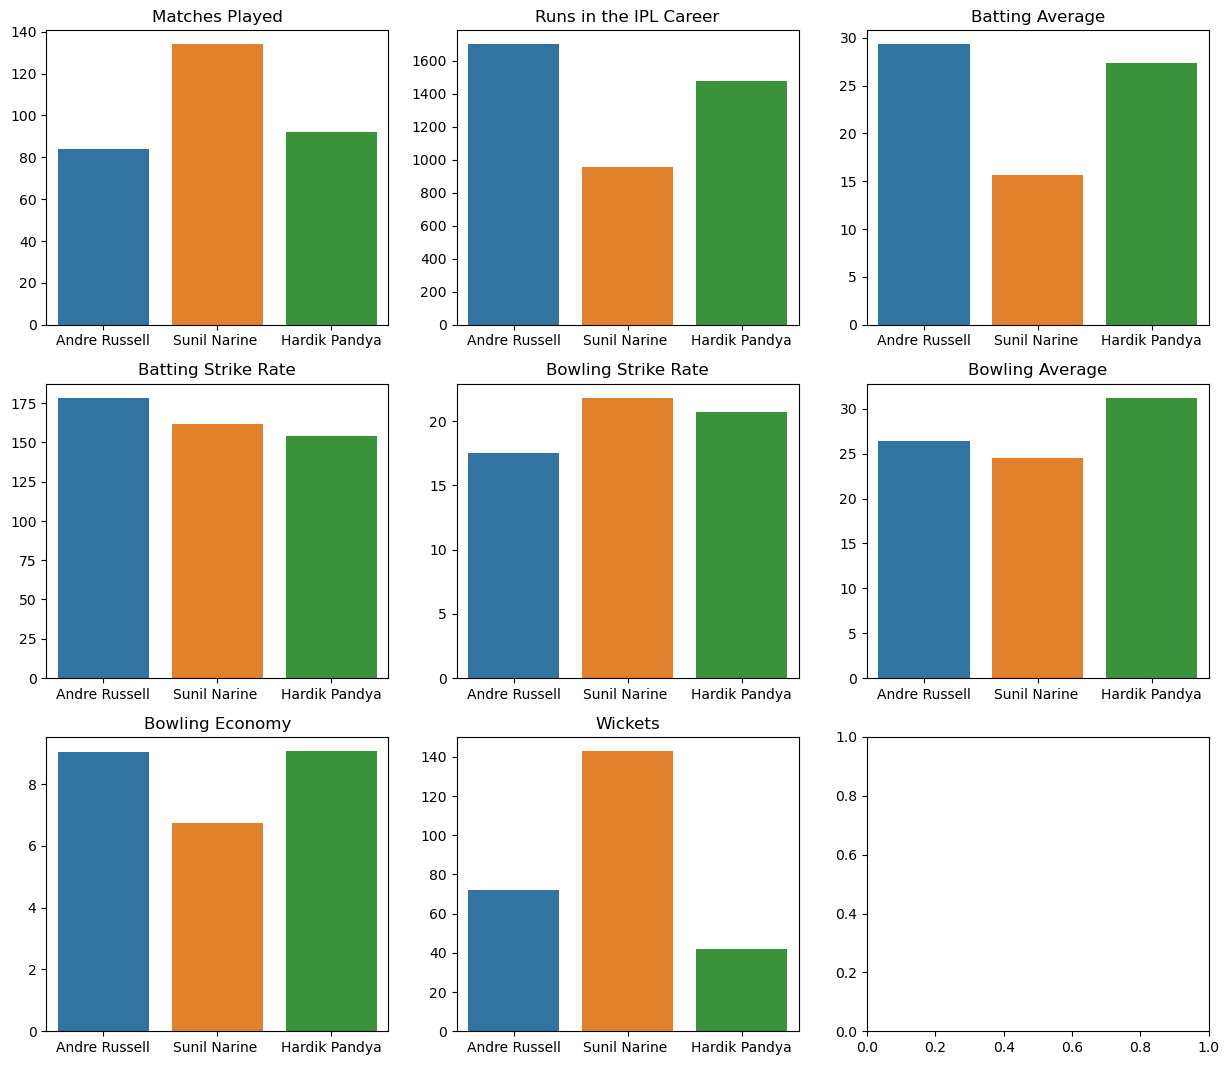

In [57]:
fig, axes = plt.subplots(3,3, figsize=(15,13))

axes[0][0].set_title("Matches Played")
axes[0][1].set_title("Runs in the IPL Career")
axes[0][2].set_title("Batting Average")
axes[1][0].set_title("Batting Strike Rate")
axes[1][1].set_title("Bowling Strike Rate")
axes[1][2].set_title("Bowling Average")
axes[2][0].set_title("Bowling Economy")
axes[2][1].set_title("Wickets")

sns.barplot(x=labels_allrounders, y=matches_values_allrounders, ax=axes[0][0])
sns.barplot(x=labels_allrounders, y=runs_values_allrounders, ax=axes[0][1])
sns.barplot(x=labels_allrounders, y=average_values_allrounders, ax=axes[0][2])
sns.barplot(x=labels_allrounders, y=strike_rate_values_allrounders, ax=axes[1][0])
sns.barplot(x=labels_allrounders, y=bowling_strike_rate_allrounders, ax=axes[1][1])
sns.barplot(x=labels_allrounders, y=bowling_average_allrounders, ax=axes[1][2])
sns.barplot(x=labels_allrounders, y=bowling_economy_allrounders, ax=axes[2][0])
sns.barplot(x=labels_allrounders, y=bowling_wickets_allrounders, ax=axes[2][1])

<h1 style="color: white">Top Bowlers</h1>
<h4 style="color: teal">
    <ol>
        <li>Kagiso Rabada</li>
        <li>Yuzvendra Chahal</li>
        <li>Nathan Coulter-Nile</li>
        <li>Jasprit Bumrah</li>
    </ol>
</h4>

In [100]:
kagiso_rabada = top_bowlers[top_bowlers["Player Name"]==sorted_best_bowlers[0][0]]
yuzvendra_chahal = top_bowlers[top_bowlers["Player Name"]==sorted_best_bowlers[1][0]]
nathan_coulter_nile = top_bowlers[top_bowlers["Player Name"]==sorted_best_bowlers[2][0]]
jasprit_bumrah = top_bowlers[top_bowlers["Player Name"]==sorted_best_bowlers[5][0]]

matches_values_bowlers = [
    kagiso_rabada["Matches_Played"].tolist()[0],
    yuzvendra_chahal["Matches_Played"].tolist()[0],
    nathan_coulter_nile["Matches_Played"].tolist()[0],
    jasprit_bumrah["Matches_Played"].tolist()[0]
]

bowling_average_values_bowlers = [
    kagiso_rabada["Bowling_average"].tolist()[0],
    yuzvendra_chahal["Bowling_average"].tolist()[0],
    nathan_coulter_nile["Bowling_average"].tolist()[0],
    jasprit_bumrah["Bowling_average"].tolist()[0]
]

bowling_economy_values_bowlers = [
    kagiso_rabada["Economy"].tolist()[0],
    yuzvendra_chahal["Economy"].tolist()[0],
    nathan_coulter_nile["Economy"].tolist()[0],
    jasprit_bumrah["Economy"].tolist()[0]
]

bowling_strike_rate_values_bowlers = [
    kagiso_rabada["Bowling_Strike_Rate"].tolist()[0],
    yuzvendra_chahal["Bowling_Strike_Rate"].tolist()[0],
    nathan_coulter_nile["Bowling_Strike_Rate"].tolist()[0],
    jasprit_bumrah["Bowling_Strike_Rate"].tolist()[0]
]

bowling_wickets_values_bowlers = [
    kagiso_rabada["Wickets"].tolist()[0],
    yuzvendra_chahal["Wickets"].tolist()[0],
    nathan_coulter_nile["Wickets"].tolist()[0],
    jasprit_bumrah["Wickets"].tolist()[0]
]

labels_bowlers = [
    sorted_best_bowlers[0][0],
    sorted_best_bowlers[1][0],
    sorted_best_bowlers[2][0],
    sorted_best_bowlers[5][0]
]

<Axes: title={'center': 'Wickets'}>

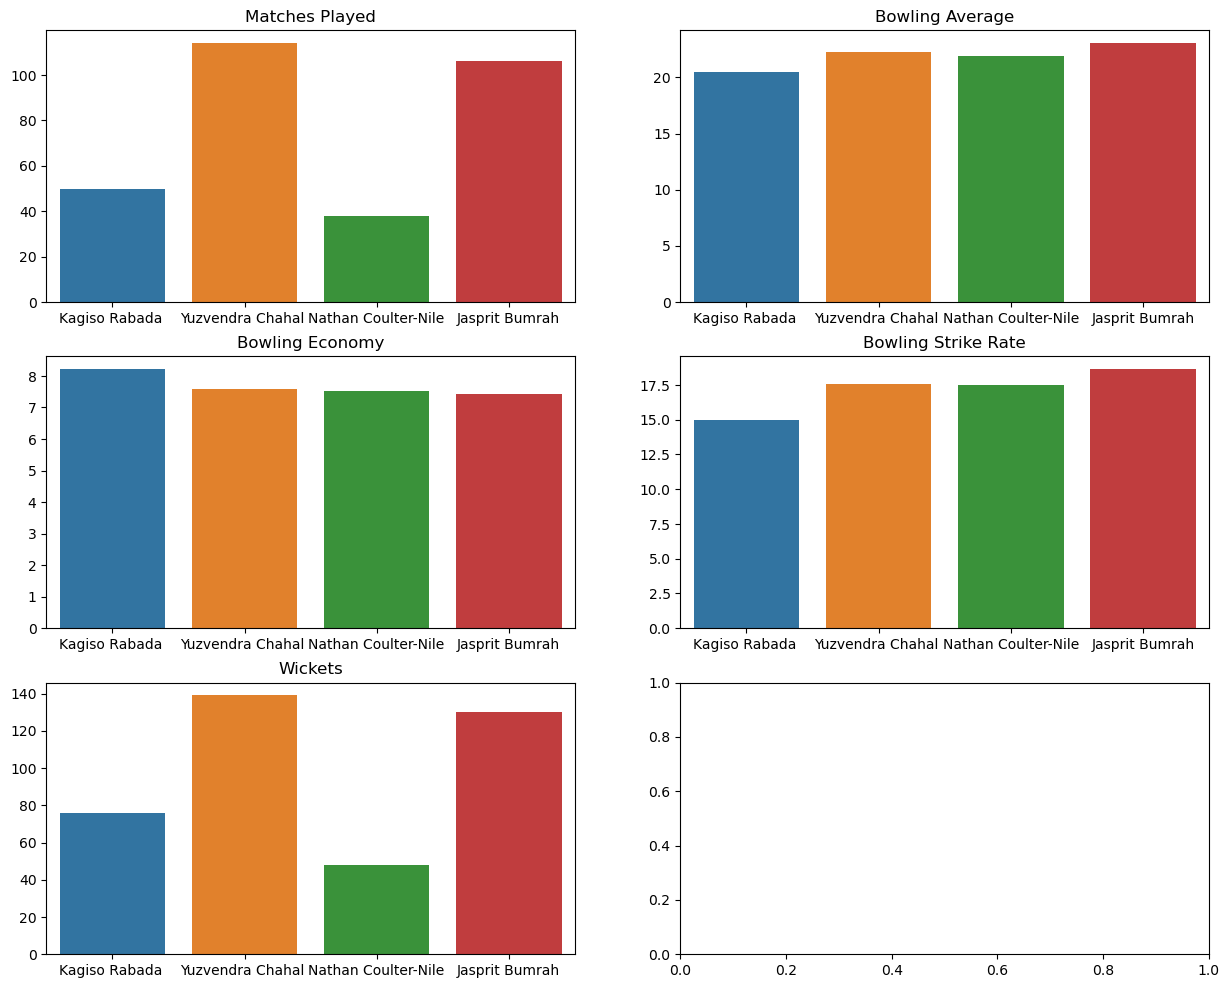

In [155]:
fig, axes = plt.subplots(3,2, figsize=(15,12))

axes[0][0].set_title("Matches Played")
axes[0][1].set_title("Bowling Average")
axes[1][0].set_title("Bowling Economy")
axes[1][1].set_title("Bowling Strike Rate")
axes[2][0].set_title("Wickets")

sns.barplot(x=labels_bowlers, y=matches_values_bowlers, ax=axes[0][0])
sns.barplot(x=labels_bowlers, y=bowling_average_values_bowlers, ax=axes[0][1])
sns.barplot(x=labels_bowlers, y=bowling_economy_values_bowlers, ax=axes[1][0])
sns.barplot(x=labels_bowlers, y=bowling_strike_rate_values_bowlers, ax=axes[1][1])
sns.barplot(x=labels_bowlers, y=bowling_wickets_values_bowlers, ax=axes[2][0])

<h1 style="color: white">Top Keeper</h1>
<h4 style="color: teal">
    <ol>
        <li>MS Dhoni</li>
    </ol>
</h4>

In [142]:
ms_dhoni = top_keepers[top_keepers["Player Name"] == sorted_best_keepers[0][0]]

matches_values_keepers = [ms_dhoni["Matches_Played"].tolist()[0]]
runs_values_keepers = [ms_dhoni["Runs"].tolist()[0]]
strike_rate_values_keepers = [ms_dhoni["Strike_Rate"].tolist()[0]]
average_values_keepers = [ms_dhoni["Average"].tolist()[0]]
catches_values_keepers = [ms_dhoni["Catches"].tolist()[0]]
stumps_values_keepers = [ms_dhoni["Stumps"].tolist()[0]]
runouts_values_keepers = [ms_dhoni["Run_outs"].tolist()[0]]

matches_runs = [ms_dhoni["Matches_Played"].tolist()[0], ms_dhoni["Runs"].tolist()[0]]
matches_runs_label = ["Matches Played", "Runs Scored"]

strike_rate_average = [
    ms_dhoni["Strike_Rate"].tolist()[0],
    ms_dhoni["Average"].tolist()[0],
]
strike_rate_average_label = ["Strike Rate", "Batting Average"]

keepering_stats = [
    ms_dhoni["Catches"].tolist()[0],
    ms_dhoni["Stumps"].tolist()[0],
    ms_dhoni["Run_outs"].tolist()[0],
]
keepering_stats_label = ["Catches","Stumps","Run Outs"]

<Axes: title={'center': 'MS Dhoni - Keepering Performance'}>

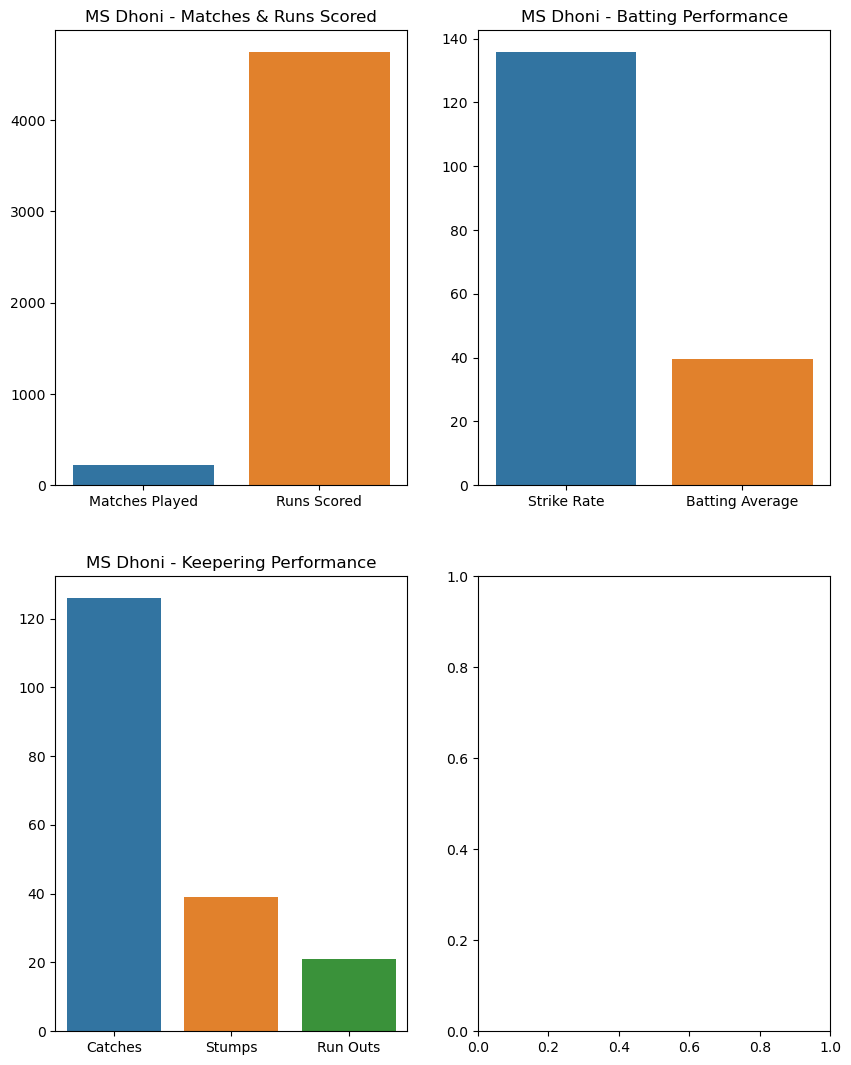

In [154]:
fig, axes = plt.subplots(2,2, figsize=(10,13))

axes[0][0].set_title("MS Dhoni - Matches & Runs Scored")
axes[0][1].set_title("MS Dhoni - Batting Performance")
axes[1][0].set_title("MS Dhoni - Keepering Performance")

sns.barplot(x=matches_runs_label, y=matches_runs, ax=axes[0][0])
sns.barplot(x=strike_rate_average_label, y=strike_rate_average, ax=axes[0][1])
sns.barplot(x=keepering_stats_label, y=keepering_stats, ax=axes[1][0])



In [191]:
kl_Rahul_complete = ipl_Auction_Raw_Data[
    ipl_Auction_Raw_Data["Player Name"] == sorted_best_batters[0][0]
]
virat_Kohli_complete = ipl_Auction_Raw_Data[
    ipl_Auction_Raw_Data["Player Name"] == sorted_best_batters[4][0]
]
david_Warner_complete = ipl_Auction_Raw_Data[
    ipl_Auction_Raw_Data["Player Name"] == sorted_best_batters[1][0]
]
andre_russel_complete = ipl_Auction_Raw_Data[
    ipl_Auction_Raw_Data["Player Name"] == sorted_best_all_rounders[0][0]
]
sunil_narine_complete = ipl_Auction_Raw_Data[
    ipl_Auction_Raw_Data["Player Name"] == sorted_best_all_rounders[1][0]
]
hardik_pandya_complete = ipl_Auction_Raw_Data[
    ipl_Auction_Raw_Data["Player Name"] == sorted_best_all_rounders[4][0]
]
ms_dhoni_complete = ipl_Auction_Raw_Data[
    ipl_Auction_Raw_Data["Player Name"] == sorted_best_keepers[0][0]
]
kagiso_rabada_complete = ipl_Auction_Raw_Data[
    ipl_Auction_Raw_Data["Player Name"] == sorted_best_bowlers[0][0]
]
yuzvendra_chahal_complete = ipl_Auction_Raw_Data[
    ipl_Auction_Raw_Data["Player Name"] == sorted_best_bowlers[1][0]
]
nathan_coulter_nile_complete = ipl_Auction_Raw_Data[
    ipl_Auction_Raw_Data["Player Name"] == sorted_best_bowlers[2][0]
]
jasprit_bumrah_complete = ipl_Auction_Raw_Data[
    ipl_Auction_Raw_Data["Player Name"] == sorted_best_bowlers[5][0]
]

In [198]:
final_11_ipl_2022 = pd.concat([
    kl_Rahul_complete,
    virat_Kohli_complete,
    david_Warner_complete,
    andre_russel_complete,
    sunil_narine_complete,
    hardik_pandya_complete,
    ms_dhoni_complete,
    kagiso_rabada_complete,
    yuzvendra_chahal_complete,
    nathan_coulter_nile_complete,
    jasprit_bumrah_complete
]).reset_index(drop=True)
final_11_ipl_2022

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
0,KL Rahul,Lucknow,Indian,Batter,1,94.0,3273.0,47.43,136.38,NaN,NaN,NaN,NaN,50.0,4.0,5.0
1,Virat Kohli,Bangalore,Indian,Batter,1,207.0,6283.0,37.40,129.95,4.0,92.00,8.80,62.75,NaN,NaN,NaN
2,David Warner,Delhi,Overseas,Batter,1,150.0,5449.0,41.60,139.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andre Russell,Kolkata,Overseas,Allrounder,1,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51,NaN,NaN,NaN
4,Sunil Narine,Kolkata,Overseas,Allrounder,1,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83,NaN,NaN,NaN
5,Hardik Pandya,Gujarat,Indian,Allrounder,1,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69,NaN,NaN,NaN
6,MS Dhoni,Chennai,Indian,Keeper,1,220.0,4746.0,39.50,135.80,NaN,NaN,NaN,NaN,126.0,21.0,39.0
7,Kagiso Rabada,Punjab,Overseas,Bowler,1,50.0,138.0,13.80,102.99,76.0,20.53,8.21,15.00,NaN,NaN,NaN
8,Yuzvendra Chahal,Rajasthan,Indian,Bowler,1,114.0,32.0,5.30,41.03,139.0,22.28,7.59,17.61,NaN,NaN,NaN
9,Nathan Coulter-Nile,Rajasthan,Overseas,Bowler,1,38.0,NaN,NaN,NaN,48.0,21.92,7.52,17.48,NaN,NaN,NaN
